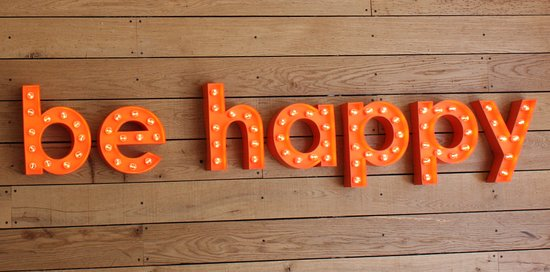

In [66]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/title_happy.jpg"
Image(filename=image_path, width=600, height=600)

## What is happiness?

Happiness, a profound and elusive emotion, is the warm embrace of the soul when life's melodies harmonize with our inner symphony. It's the radiant sunbeam that pierces through the darkest of clouds, illuminating our path with hope and joy. Happiness is not a fleeting moment but a state of being, a tapestry woven from the threads of gratitude, contentment, and love.

It resides in the simple pleasures of life, like the laughter of children, the scent of blooming flowers, or the gentle touch of a loved one's hand. It's the satisfaction derived from pursuing our passions, the exhilaration of reaching new heights, and the serenity found in quiet moments of reflection.

Happiness is a choice, an art of embracing life's imperfections with a heart full of acceptance. It's the empathy we extend to others, the acts of kindness that create ripples of joy, and the connections we forge with fellow travelers on this journey.

In the tapestry of life, happiness is the vibrant thread that weaves through our experiences, making each moment precious. It's the compass that guides us towards a life well-lived, reminding us that true happiness is not found in possessions but in the richness of our human connections and the depths of our souls.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
!pip install seaborn

In [3]:
cleaned_hm_csv_path = "/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/cleaned_hm.csv"
demographic_csv_path = "/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/demographic.csv"

## Fortunately, we've got our hands on a dataset focused on happiness and joyous moments. We're all set to embark on an exciting journey of analyzing the Happy Moment Database. Let's dive right in!

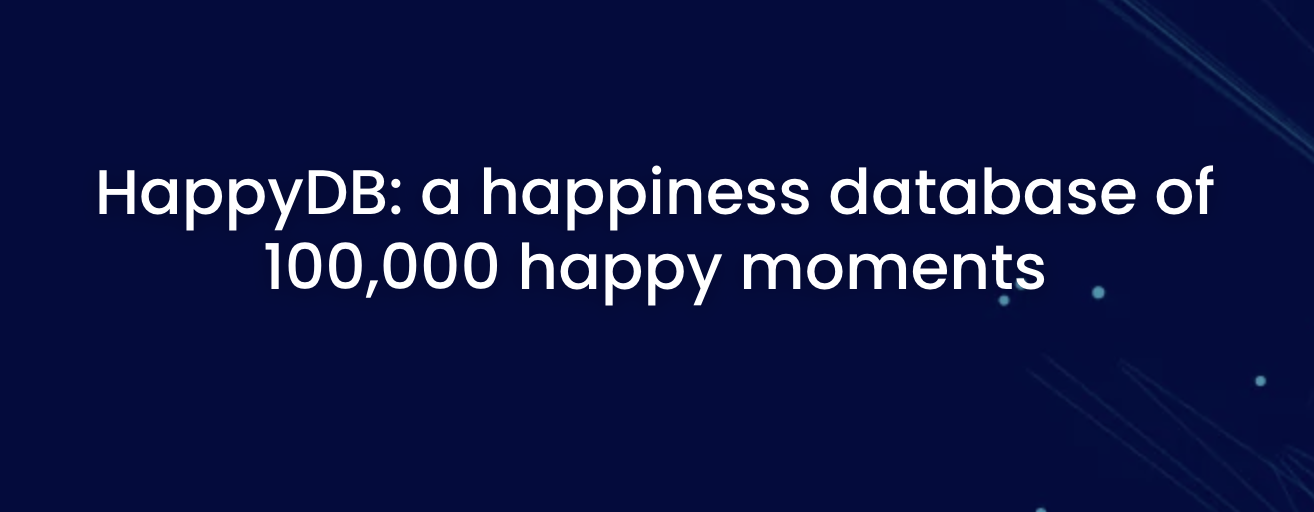

In [67]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/happy_db.jpg"
Image(filename=image_path, width=600, height=600)

## 1: What really matters in our happiness?

#### WordCloud

In [26]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 966.5 kB/s eta 0:00:00 0:00:01m
Note: you may need to restart the kernel to use updated packages.


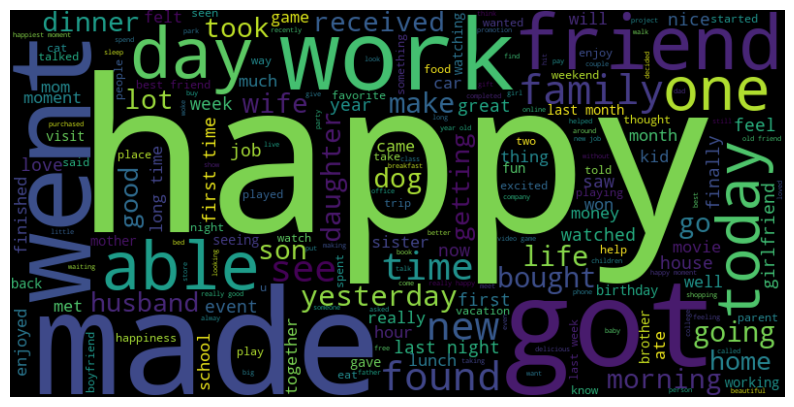

In [68]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/cleaned_hm.csv')

# Concatenate text data from the 'cleaned_hm' column into a long string
text = ' '.join(df['cleaned_hm'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()



In [34]:
pip install spacy 

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/ca/f3/609bb7512cad1f02af13daa23aa433b931da34c502211f29fd47dceff624/spacy-3.7.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/7a/05/4a3b5c3043c6d84c00bf0f574d326660702b1c10174fe6b44cef3c3dff08/murmurhash-1.0.10-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/d7/f6/67babf1439cdd6d46e4e805616bee84981305c80e562320c293712f54034/cymem-2.0.8-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/pa

In [38]:
!pip install spacy wordcloud matplotlib
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.6 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [41]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Read the data
df = pd.read_csv('/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/cleaned_hm.csv')

# Concatenate all the text data
text = ' '.join(df['cleaned_hm'].dropna())

# Define a function to process large text
def process_large_text(text, chunk_size=1000000):
    """
    Split a large text into smaller chunks and process each chunk using spaCy.
    """
    nlp.max_length = chunk_size
    doc_chunks = []
    for i in range(0, len(text), chunk_size):
        doc_chunk = nlp(text[i:i+chunk_size])
        doc_chunks.append(doc_chunk)
    return doc_chunks

# Call the function to process the text
doc_chunks = process_large_text(text)

# Now I can perform further processing on each document chunk, such as extracting information, generating word clouds, etc.

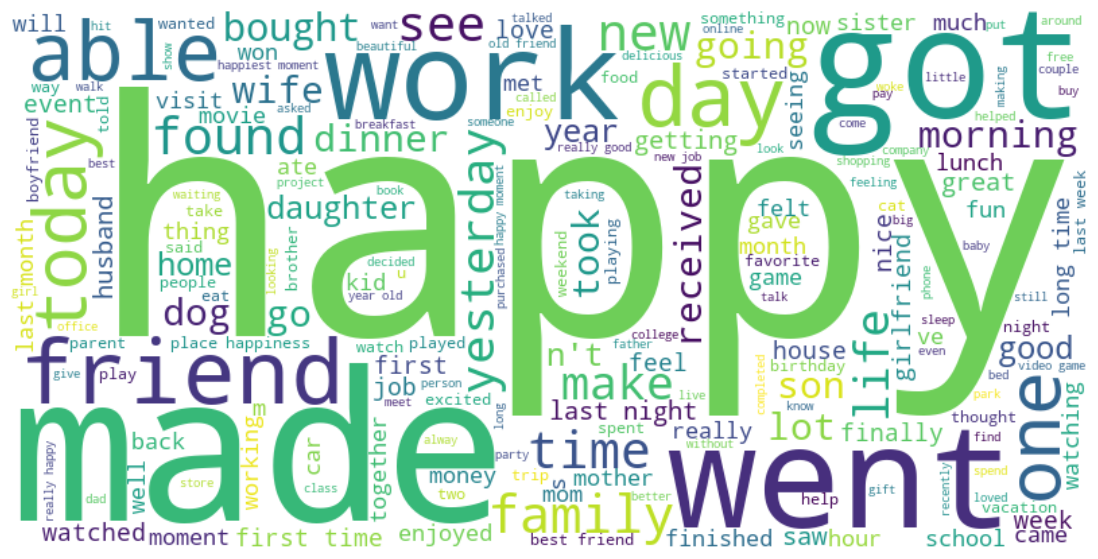

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Merge all the words from the document chunks
all_words = []
for doc_chunk in doc_chunks:
    all_words.extend([token.text for token in doc_chunk])

# Concatenate the processed words into a long string
cleaned_text = ' '.join(all_words)

# Generate a word cloud using WordCloud, you can specify additional parameters like stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(cleaned_text)

# Display the generated word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

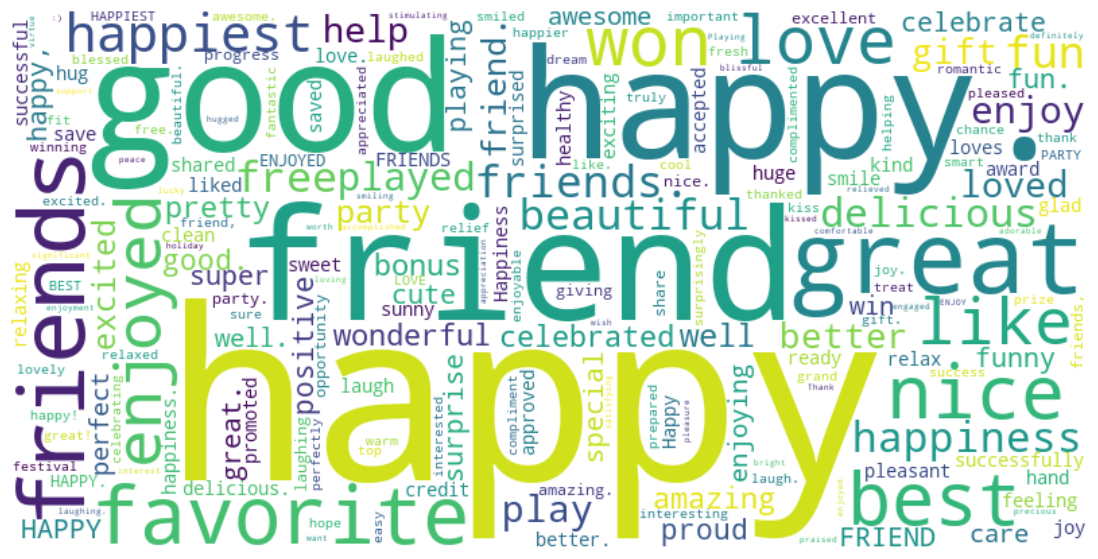

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Read the data
df = pd.read_csv('/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/cleaned_hm.csv')

# Concatenate all the text data
text = ' '.join(df['cleaned_hm'].dropna())

# Perform sentiment analysis on the text and accumulate sentiment scores
word_sentiments = {}  # Dictionary for word sentiments
for word in text.split():
    sentiment = sia.polarity_scores(word)['compound']
    word_sentiments[word] = word_sentiments.get(word, 0) + sentiment

# Generate a word cloud based on accumulated sentiment scores for words
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_sentiments)

# Display the generated word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [50]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 2.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenjianfeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


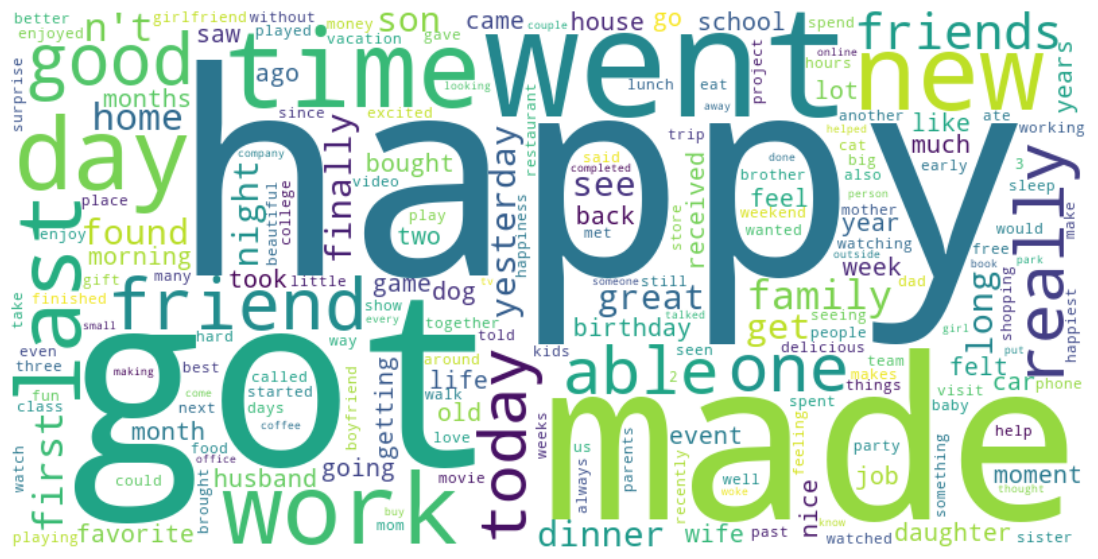

In [52]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

# Read the data
df = pd.read_csv('/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/cleaned_hm.csv')

# Concatenate all the text data
text = ' '.join(df['cleaned_hm'].dropna())

# Perform sentiment analysis using TextBlob
blob = TextBlob(text)

# Get the sentiment score of the text
sentiment_score = blob.sentiment.polarity

# Tokenize the text
words = blob.words

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Create a dictionary of word sentiments
word_sentiments = {}
for word in filtered_words:
    word_sentiments[word] = blob.word_counts[word] * sentiment_score

# Generate a word cloud based on accumulated sentiment scores for words
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_sentiments)

# Display the generated word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

📒
*In the HappyDB dataset, regardless of whether stop words are removed, we can distinctly see a few high-frequency words in the cumulative sentiment scores of the language model: work, friend, family, time, birthday, school, and more. This demonstrates that moments of happiness are ever-present in our lives. My parents often tell me that marriage is a significant lifelong investment that greatly influences one's happiness in the latter part of life, and I'm very much looking forward to finding a partner with whom I can grow together. Hence, my theme today revolves around the relationship between marriage and happiness. Follow in my footsteps! 👣*

*Here's a more idiomatic English version*:

*Within the HappyDB dataset, whether or not we filter out stop words, the sentiment scores from the language model clearly highlight several prevalent words: work, friend, family, time, birthday, school, among others. This underscores that moments of happiness are intertwined with our daily existence. My parents often emphasize that marriage is a profound lifelong commitment that significantly shapes our happiness in life's second half, and I eagerly anticipate finding a companion to grow alongside. Therefore, today's topic is the intricate connection between marriage and happiness. Let's embark on this journey together! 👣*

## 2. Does getting married guarantee happiness for us? What about the single nobility?

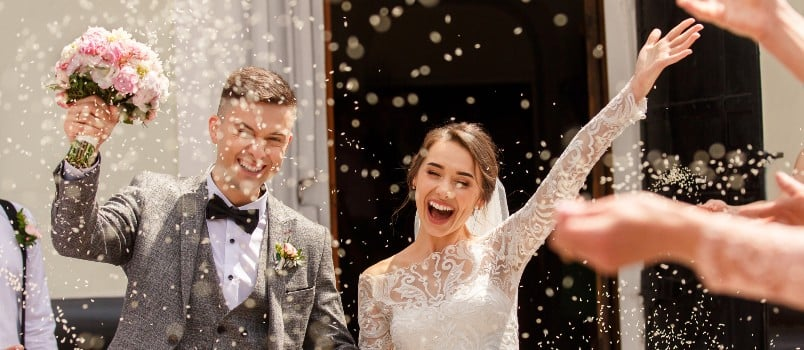

In [69]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/marital_happy.jpg"
Image(filename=image_path, width=600, height=600)

#### Analyze which group has a stronger sense of happiness, married or single individuals.

read clean_hm.csv and degographic.csv file

In [4]:
clean_hm_df = pd.read_csv(cleaned_hm_csv_path)
clean_hm_df.head()

hmid   wid reflection_period  \
0  27673  2053               24h   
1  27674     2               24h   
2  27675  1936               24h   
3  27676   206               24h   
4  27677  6227               24h   

                                         original_hm  \
0  I went on a successful date with someone I fel...   
1  I was happy when my son got 90% marks in his e...   
2       I went to the gym this morning and did yoga.   
3  We had a serious talk with some friends of our...   
4  I went with grandchildren to butterfly display...   

                                          cleaned_hm  modified  num_sentence  \
0  I went on a successful date with someone I fel...      True             1   
1  I was happy when my son got 90% marks in his e...      True             1   
2       I went to the gym this morning and did yoga.      True             1   
3  We had a serious talk with some friends of our...      True             2   
4  I went with grandchildren to butterfly display...      True             1   

  ground_truth_category predicted_category  
0                   NaN          affection  
1                   NaN          affection  
2                   NaN           exercise  
3               bonding            bonding  
4                   NaN          affection

In [5]:
demographic_df = pd.read_csv(demographic_csv_path)
demographic_df.head()

wid   age country gender  marital parenthood
0    1  37.0     USA      m  married          y
1    2  29.0     IND      m  married          y
2    3    25     IND      m   single          n
3    4    32     USA      m  married          y
4    5    29     USA      m  married          y

In [6]:
clean_hm_df.dropna(subset=['ground_truth_category'],inplace=True)

In [7]:
merge_df = demographic_df.merge(clean_hm_df,on='wid')

In [8]:
merge_df.head()

wid   age country gender  marital parenthood   hmid reflection_period  \
0    1  37.0     USA      m  married          y  28054               24h   
1    1  37.0     USA      m  married          y  57637               24h   
2    1  37.0     USA      m  married          y  64498                3m   
3    1  37.0     USA      m  married          y  80306                3m   
4    1  37.0     USA      m  married          y  88307                3m   

                                         original_hm  \
0  My mother called out of the blue to tell me ho...   
1  I got to take the day off from my part time jo...   
2       my son had a great time on his 8th birthday.   
3  I got to have a three day weekend which i spen...   
4  My fiance proposed to me in front of my family...   

                                          cleaned_hm  modified  num_sentence  \
0  My mother called out of the blue to tell me ho...      True             1   
1  I got to take the day off from my part time jo...      True             1   
2       my son had a great time on his 8th birthday.      True             1   
3  I got to have a three day weekend which i spen...      True             1   
4  My fiance proposed to me in front of my family...      True             1   

  ground_truth_category predicted_category  
0             affection          affection  
1             affection          affection  
2             affection          affection  
3             affection          affection  
4             affection          affection

In [9]:
merge_df = merge_df[merge_df['country'] == 'USA']

In [10]:
merge_df['age'] = pd.to_numeric(merge_df['age'], errors='coerce')
merge_df['age'] = merge_df['age'].fillna(0).astype(int)
adult_df = merge_df[merge_df['age']>16]

In [11]:
adult_df.head()

wid  age country gender  marital parenthood   hmid reflection_period  \
0    1   37     USA      m  married          y  28054               24h   
1    1   37     USA      m  married          y  57637               24h   
2    1   37     USA      m  married          y  64498                3m   
3    1   37     USA      m  married          y  80306                3m   
4    1   37     USA      m  married          y  88307                3m   

                                         original_hm  \
0  My mother called out of the blue to tell me ho...   
1  I got to take the day off from my part time jo...   
2       my son had a great time on his 8th birthday.   
3  I got to have a three day weekend which i spen...   
4  My fiance proposed to me in front of my family...   

                                          cleaned_hm  modified  num_sentence  \
0  My mother called out of the blue to tell me ho...      True             1   
1  I got to take the day off from my part time jo...      True             1   
2       my son had a great time on his 8th birthday.      True             1   
3  I got to have a three day weekend which i spen...      True             1   
4  My fiance proposed to me in front of my family...      True             1   

  ground_truth_category predicted_category  
0             affection          affection  
1             affection          affection  
2             affection          affection  
3             affection          affection  
4             affection          affection

In [12]:
adult_wid_unique_df = adult_df.drop_duplicates(subset=['wid'])

### Surveys in the United States indicate that single individuals report a stronger sense of happiness.

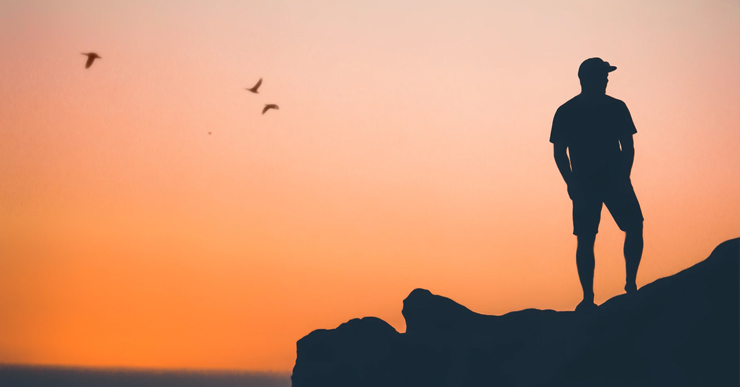

In [70]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/single_happy.jpg"
Image(filename=image_path, width=600, height=600)

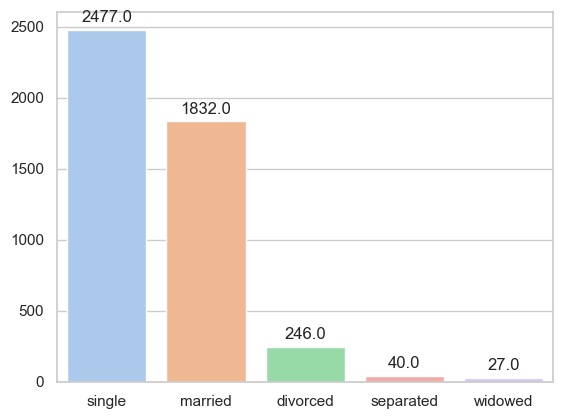

In [13]:
marital_series = adult_wid_unique_df['marital'].value_counts()
sns.set_theme(style="whitegrid", palette="pastel")
barplot  = sns.barplot(x=marital_series.index,y=marital_series.values)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

📒
*The bar chart illustrates the number of individuals who experience happiness in various marital statuses. The data reveal that single individuals in the United States report a strong sense of happiness, with a proportion significantly higher than that of other groups. It is evident that the single population in America enjoys a level of happiness and joy that surpasses expectations.*

*Here's a more idiomatic English rewrite:*

*The bar graph presents the count of people experiencing joy across different marital statuses. It's clear from the data that those who are single in the U.S. have a notably robust sense of happiness, standing out with a significantly higher ratio than other demographics. This discovery highlights that the lives of American singles are filled with more happiness and joy than one might presume.*

In [14]:
bins = [16, 20, 25, 30,35,40,45,50,55,60]
labels = ['16-20', '21-25', '26-30','31-35', '36-40', '41-45','46-50', '51-55', '56-60']
adult_wid_unique_df['range'] = pd.cut(adult_wid_unique_df['age'], bins=bins, labels=labels)

/var/folders/x1/cmq6ht1x7ygffd5zpgqj2kv80000gn/T/ipykernel_68554/3292791220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_wid_unique_df['range'] = pd.cut(adult_wid_unique_df['age'], bins=bins, labels=labels)


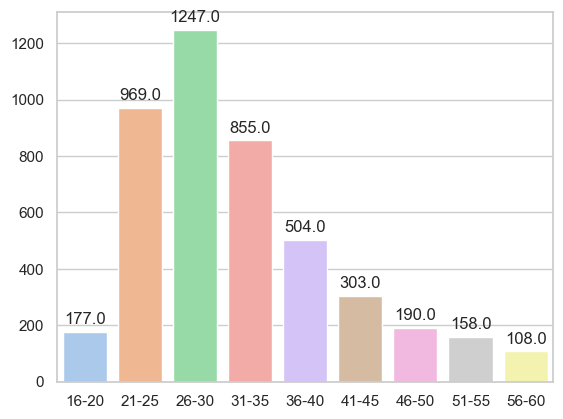

In [15]:
range_count_series = adult_wid_unique_df['range'].value_counts()
barplot  = sns.barplot(x=range_count_series.index,y=range_count_series.values)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

*The chart above segments data across age groups in increments of five years, from 16 to 60, creating nine distinct age bands. This stratification allows us to discern the age distribution of the survey respondents, revealing that a significant majority are concentrated in the 21 to 35 age range. This distribution could be indicative of the demographic makeup of the broader society.*

*Brainstorimg 🌟🌟🌟 : Supplement: You can dig deeper into this area, analyze the distribution of different proportions of men and women, and obtain the number of happy sentences for each age group to investigate the differences between men and women's happiness.*

In [16]:
married_range_count = adult_wid_unique_df[adult_wid_unique_df['marital']=='married']['range'].value_counts()

married_range_count_dict = married_range_count.to_dict()

married_range_count_dict

{'31-35': 456,
 '26-30': 435,
 '36-40': 309,
 '41-45': 172,
 '21-25': 132,
 '51-55': 96,
 '46-50': 93,
 '56-60': 62,
 '16-20': 5}

In [17]:
married_range_count_updated_dict = {}
def update_list_to_cumulative_sum(lst):
    for i in range(1, len(lst)):
        lst[i] += lst[i - 1]
    return lst

updated_list = update_list_to_cumulative_sum(list(married_range_count_dict.values()))

for idx,key in  enumerate(married_range_count_dict.keys()):
    married_range_count_updated_dict[key] = updated_list[idx]

married_range_count_series = pd.Series(married_range_count_updated_dict)
married_range_count_updated_dict

{'31-35': 456,
 '26-30': 891,
 '36-40': 1200,
 '41-45': 1372,
 '21-25': 1504,
 '51-55': 1600,
 '46-50': 1693,
 '56-60': 1755,
 '16-20': 1760}

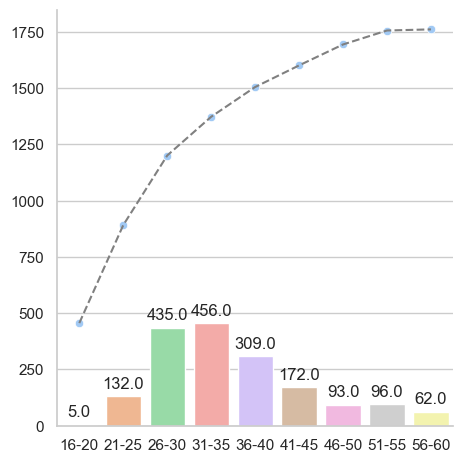

In [18]:
g = sns.relplot(x=married_range_count_series.index,y=married_range_count_series.values,kind='scatter')
ax = g.axes[0,0]
ax.plot(married_range_count_series.index, married_range_count_series.values, color='gray', linestyle='--')
barplot  = sns.barplot(x=married_range_count.index,y=married_range_count.values,ax=ax)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

📒*From the perspective of the distribution of single people in various age ranges, first let's look at the histogram below, and combined with the distribution chart of single age ranges below, it is not difficult to see that the proportion of people aged 31-40 is larger than that of single people, which may be reflected from one side, and then After enjoying the happiness of single aristocrats, people in their 30s gradually began to consider marriage and family. Therefore, in the 30-40 range of the chart, the proportion of people who enjoy the happiness brought by marriage is larger than that of those who enjoy the happiness of being single. The above line chart also reflects from the side that people gradually consider marriage after the age of 20.*

🌟🌟🌟*Note: I just thought about this part and it still needs to be discussed. Later, I will further analyze the base ratio. It is okay not to explain the line chart. For the time being, it does not necessarily represent the growth trend of marriage.*

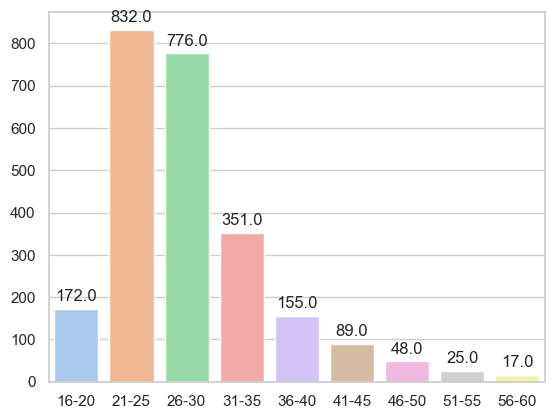

In [19]:
sinle_range_count = adult_wid_unique_df[adult_wid_unique_df['marital']=='single']['range'].value_counts()
barplot  = sns.barplot(x=sinle_range_count.index,y=sinle_range_count.values)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

📒*Judging from the distribution of single people in various age ranges, it may reflect that in the 21-30 age range, young people are more enjoying the happiness brought by being single, and have not yet considered getting married, forming a family, or having children. Parenting.*

In [20]:
adult_df.head()

wid  age country gender  marital parenthood   hmid reflection_period  \
0    1   37     USA      m  married          y  28054               24h   
1    1   37     USA      m  married          y  57637               24h   
2    1   37     USA      m  married          y  64498                3m   
3    1   37     USA      m  married          y  80306                3m   
4    1   37     USA      m  married          y  88307                3m   

                                         original_hm  \
0  My mother called out of the blue to tell me ho...   
1  I got to take the day off from my part time jo...   
2       my son had a great time on his 8th birthday.   
3  I got to have a three day weekend which i spen...   
4  My fiance proposed to me in front of my family...   

                                          cleaned_hm  modified  num_sentence  \
0  My mother called out of the blue to tell me ho...      True             1   
1  I got to take the day off from my part time jo...      True             1   
2       my son had a great time on his 8th birthday.      True             1   
3  I got to have a three day weekend which i spen...      True             1   
4  My fiance proposed to me in front of my family...      True             1   

  ground_truth_category predicted_category  
0             affection          affection  
1             affection          affection  
2             affection          affection  
3             affection          affection  
4             affection          affection

### The sense of happiness among single individuals is often reflected in the joy of achieving continuous progress in work and studies and gaining recognition from others, which embodies their sense of life's value.

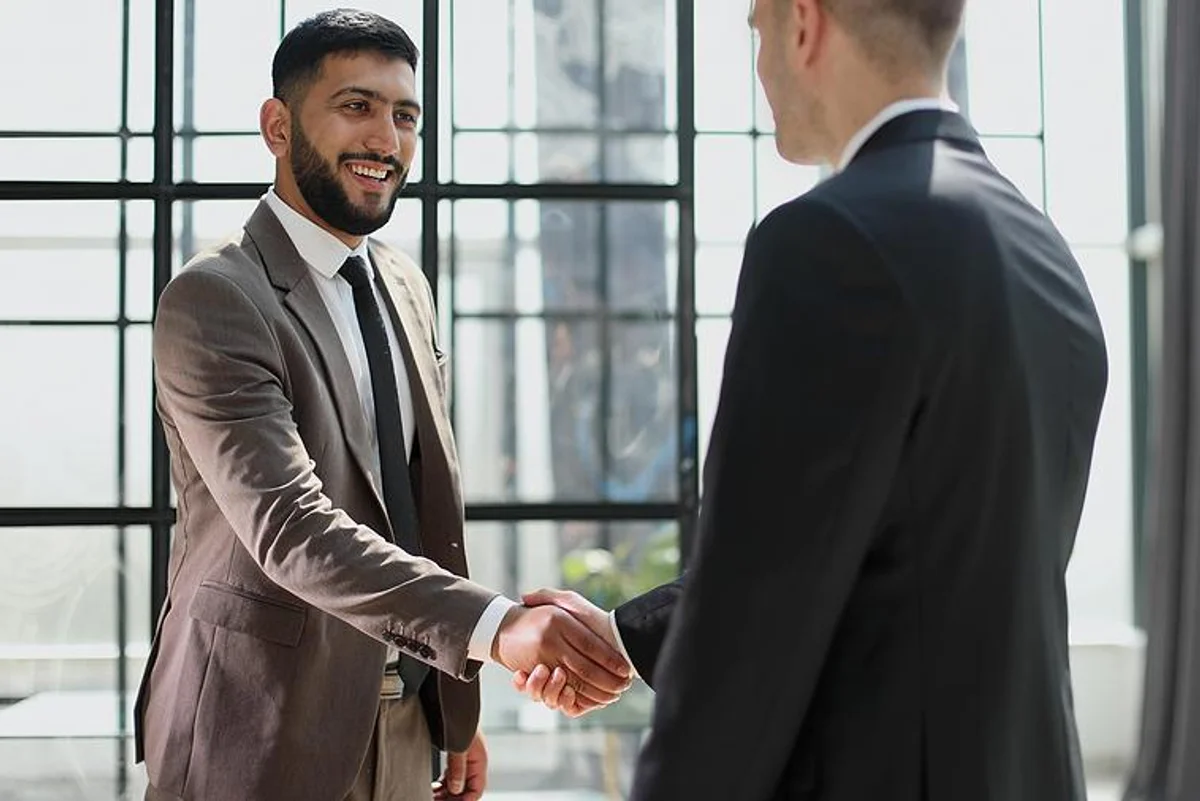

In [71]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/career_happy.jpg"
Image(filename=image_path, width=600, height=600)

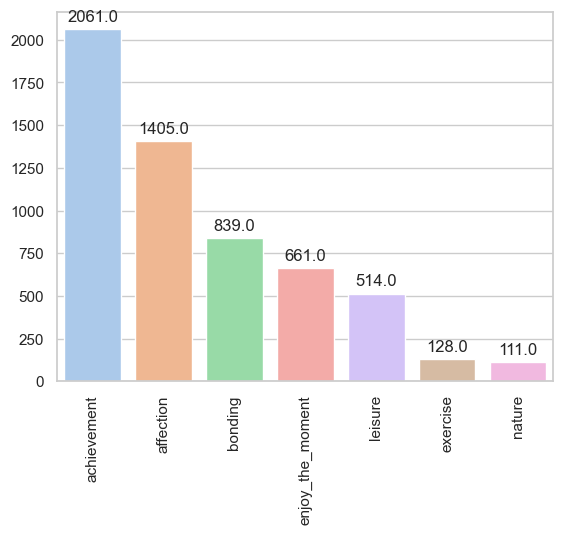

In [21]:
single_series = adult_df[adult_df['marital']=='single']['predicted_category'].value_counts()
barplot  = sns.barplot(x=single_series.index,y=single_series.values)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

📒*This is a distribution map of different happiness types of single people. Comparing the figure below, it is easy to see that single young people are better than married people in terms of exercise, leisure, enjoy_the_moment, bonding, etc. Single people are far better than married people of the same age. They are more keen on various social activities, such as dining out, exercising, taking elective art and music courses, participating in various public and charity activities, etc. In particular, the achievement item is higher than that of married people, which shows that they still focus on career and value career and academic achievements more.*

### It is the fondness for the caring atmosphere of family that leads them to happily walk down the aisle into matrimony.

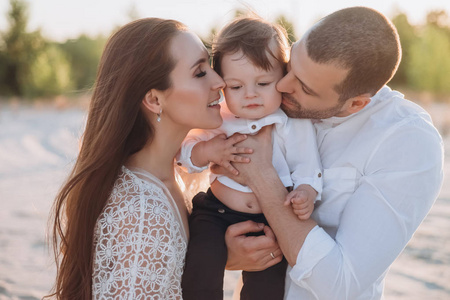

In [72]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/parenthood_happy.jpg"
Image(filename=image_path, width=600, height=600)

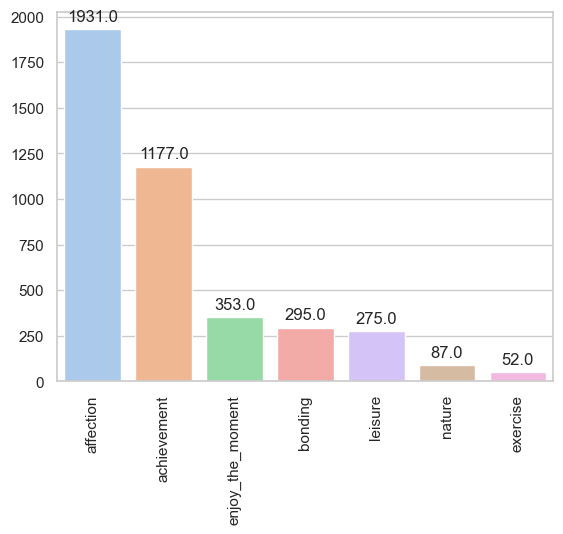

In [22]:
married_series = adult_df[adult_df['marital']=='married']['predicted_category'].value_counts()
barplot  = sns.barplot(x=married_series.index,y=married_series.values)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

📒*This is a distribution map of different happiness types of single people. Comparing the figure below, it is easy to see that single young people are better than married people in terms of exercise, leisure, enjoy_the_moment, bonding, etc. Single people are far better than married people of the same age. They are more keen on various social activities, such as dining out, exercising, taking elective art and music courses, participating in various public and charity activities, etc. In particular, the achievement item is higher than that of married people, which shows that they still focus on career and value career and academic achievements more.*

## In marriage, the source of happiness often stems from the affection shared between partners.

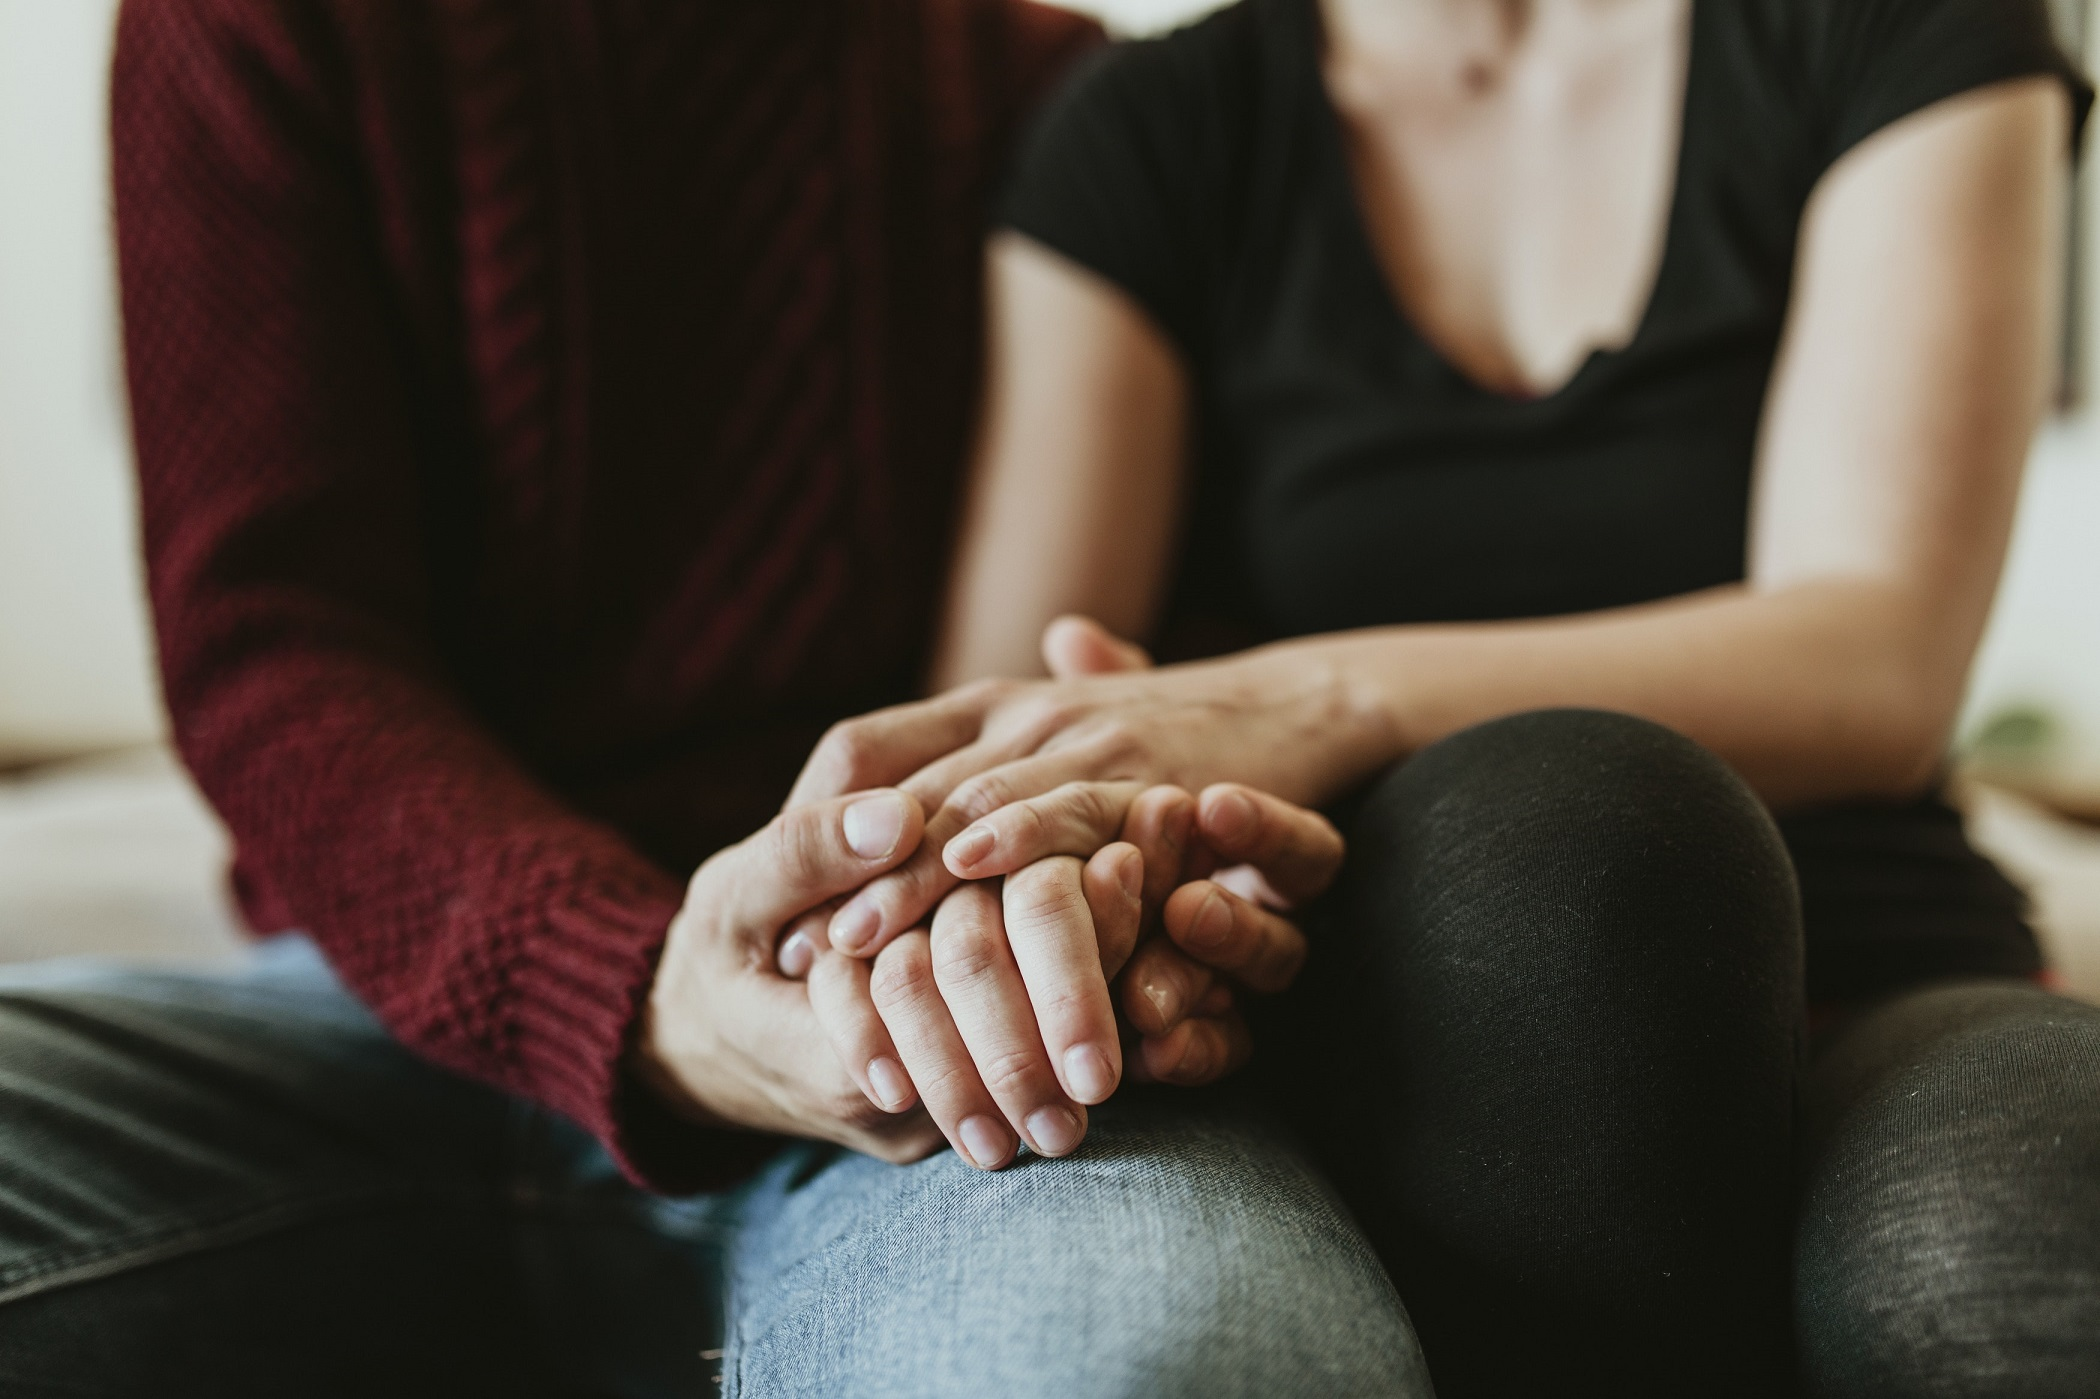

In [73]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/partner_happy.jpg"
Image(filename=image_path, width=600, height=600)

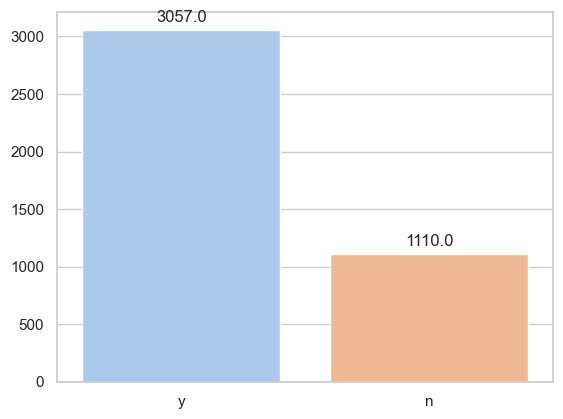

In [23]:
married_parenthood_series = adult_df[adult_df['marital']=='married']['parenthood'].value_counts()
barplot  = sns.barplot(x=married_parenthood_series.index,y=married_parenthood_series.values)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

📒*Among married people, comparing those with children and those without children, it is not difficult to see that the proportion of married people with children is larger. Maybe the source of happiness for married people is affection, and affection may be spending time with family members. Sharing happy times together may make people with children feel more happy. This may also be one of the reasons for forming a family and getting married.*

### Explore: Result comparison in terms of happy moment statistcis and sentiment analysis model

In [54]:
df = pd.read_csv("sementic_cleaned_hm.csv")
df.head()

In [ ]:
demographic_csv_path = "/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/demographic.csv"
demographic_df = pd.read_csv(demographic_csv_path)
demographic_df.head()

wid   age country gender  marital parenthood
0    1  37.0     USA      m  married          y
1    2  29.0     IND      m  married          y
2    3    25     IND      m   single          n
3    4    32     USA      m  married          y
4    5    29     USA      m  married          y

C:\Users\yhyxx\AppData\Local\Temp\ipykernel_6836\268421861.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'affection'),
 Text(1, 0, 'exercise'),
 Text(2, 0, 'bonding'),
 Text(3, 0, 'leisure'),
 Text(4, 0, 'achievement'),
 Text(5, 0, 'enjoy_the_moment'),
 Text(6, 0, 'nature')]

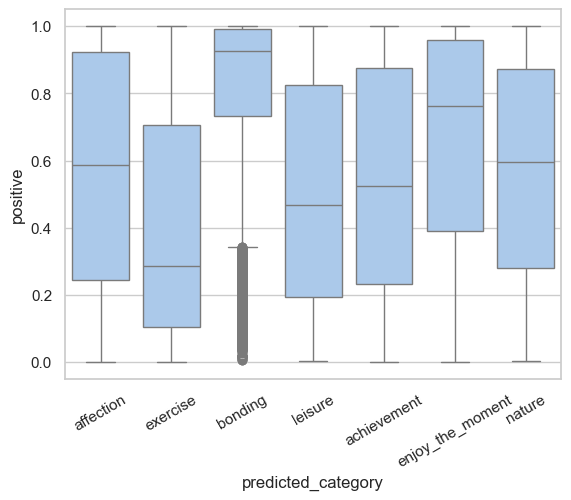

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.boxplot(x='predicted_category', y='positive', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
df_ground_truth = df.dropna(subset=['ground_truth_category'])

C:\Users\yhyxx\AppData\Local\Temp\ipykernel_6836\2889382971.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'bonding'),
 Text(1, 0, 'leisure'),
 Text(2, 0, 'affection'),
 Text(3, 0, 'enjoy_the_moment'),
 Text(4, 0, 'achievement'),
 Text(5, 0, 'nature'),
 Text(6, 0, 'exercise')]

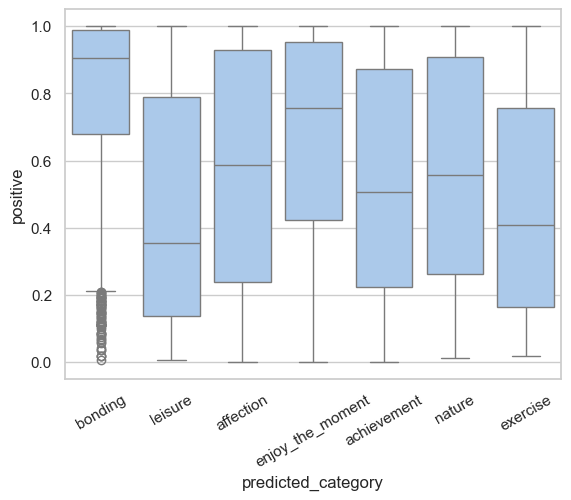

In [ ]:
ax = sns.boxplot(x='predicted_category', y='positive', data=df_ground_truth)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

C:\Users\yhyxx\AppData\Local\Temp\ipykernel_6836\1198910182.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'bonding'),
 Text(1, 0, 'leisure'),
 Text(2, 0, 'affection'),
 Text(3, 0, 'enjoy_the_moment'),
 Text(4, 0, 'achievement'),
 Text(5, 0, 'nature'),
 Text(6, 0, 'exercise')]

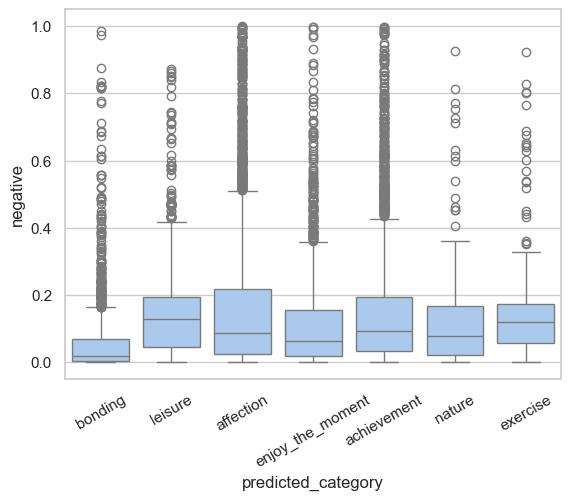

In [ ]:
ax = sns.boxplot(x='predicted_category', y='negative', data=df_ground_truth)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
merge_df = df_ground_truth.merge(demographic_df,on='wid')
merge_df.head()

Unnamed: 0   hmid  wid reflection_period  \
0           3  27676  206               24h   
1       21745  49534  206               24h   
2       24645  52451  206               24h   
3       56163  84125  206                3m   
4       57156  85125  206                3m   

                                         original_hm  \
0  We had a serious talk with some friends of our...   
1                         I bought my wedding shoes!   
2                  My new watch arrived in the mail!   
3  We watched Rocky Horror Picture Show for the f...   
4                  We played Mario Kart while drunk.   

                                          cleaned_hm  modified  num_sentence  \
0  We had a serious talk with some friends of our...      True             2   
1                         I bought my wedding shoes!      True             1   
2                  My new watch arrived in the mail!      True             1   
3  We watched Rocky Horror Picture Show for the f...      True             1   
4                  We played Mario Kart while drunk.      True             1   

  ground_truth_category predicted_category  positive  negative   neutral age  \
0               bonding            bonding  0.954003  0.044106  0.001891  28   
1           achievement        achievement  0.221079  0.271567  0.507355  28   
2           achievement        achievement  0.146610  0.213970  0.639420  28   
3               leisure            leisure  0.717492  0.189807  0.092702  28   
4               leisure            leisure  0.649013  0.241162  0.109825  28   

  country gender  marital parenthood  
0     DNK      f  married          n  
1     DNK      f  married          n  
2     DNK      f  married          n  
3     DNK      f  married          n  
4     DNK      f  married          n

In [ ]:
merge_df['age'] = pd.to_numeric(merge_df['age'], errors='coerce')

bins = [16, 20, 25, 30,35,40,45,50,55,60]
labels = ['16-20', '21-25', '26-30','31-35', '36-40', '41-45','46-50', '51-55', '56-60']
merge_df['range'] = pd.cut(merge_df['age'], bins=bins, labels=labels)

In [ ]:
df_age_category_df = merge_df[['ground_truth_category','range','positive']]
df_age_category_df.head()

ground_truth_category  range  positive
0               bonding  26-30  0.954003
1           achievement  26-30  0.221079
2           achievement  26-30  0.146610
3               leisure  26-30  0.717492
4               leisure  26-30  0.649013

<Axes: xlabel='range', ylabel='ground_truth_category'>

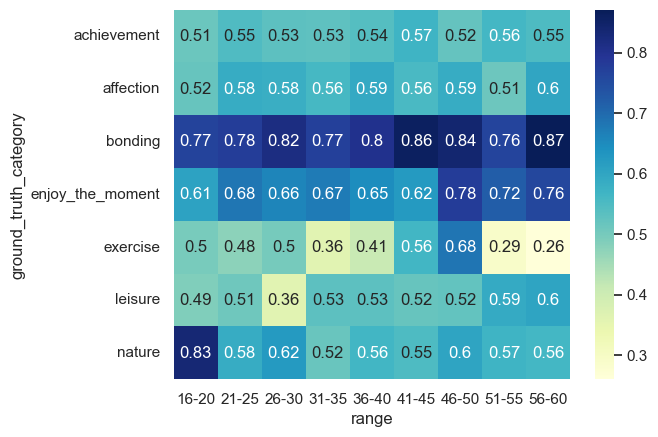

In [ ]:
grouped_category_age = df_age_category_df.groupby(['range', 'ground_truth_category']).mean()
pivot_table_category_age = grouped_category_age.pivot_table(index='ground_truth_category', columns='range', values='positive')
sns.heatmap(pivot_table_category_age, annot=True, cmap="YlGnBu")

📒*It is not difficult for us to find in the heat map after weighting the emotional scoring model, whether it is 16-20, 21-25, 26-30, 36-40, 41-45, 46-50, 51-55, 56-60 age range Bonding has the strongest correlation, but based on the statistics of the number of happy moments we obtained above, "the biggest source of happiness for married people is affections" and "the biggest source of happiness for single people is achievement". These results are contrary to each other, so we judge this The emotional scoring model may not be suitable for our data. We can try more emotional scoring models in the future, such as roberta, spaCy, etc.* 

📒
*From here we can be more confident that the emotion scoring model we chose has increased the outliers of the data to a certain extent.*

When using sentiment models to score data and then creating box plots for weighted statistics, the presence of a large number of outliers can occur for several reasons:

1. **Skewed Data**: The underlying data might be skewed. Sentiment scores often have a non-normal distribution, especially in datasets with diverse expressions of sentiment that can lead to a heavy concentration of scores at one end of the spectrum.

2. **Sensitive Scoring Model**: The sentiment model used for scoring might be very sensitive to certain keywords or phrases, causing a wider dispersion of sentiment scores that are not representative of the general sentiment.

3. **Diverse Sentiment Expression**: People express sentiments in very different ways. Some expressions may be very mild, while others are extremely positive or negative, which can lead to scores that are significantly higher or lower than the median.

4. **Weighting Issues**: If the statistical weighting is not applied correctly or the weights themselves are not representative of the population, it can distort the sentiment scores and lead to outliers.

5. **Data Entry Errors**: Sometimes, outliers are simply the result of data entry errors or anomalies in the data collection process.

6. **Narrow Interquartile Range (IQR)**: A box plot displays outliers based on the IQR. If the IQR is narrow due to a large clustering of data within a specific sentiment score range, then even moderately deviant scores can appear as outliers.

To address this, you might consider the following approaches:

- **Data Cleaning**: Ensure that the data is cleaned properly to remove any errors that might cause outliers.

- **Model Calibration**: Adjust the sentiment model to be less sensitive to outliers or to better accommodate the range of sentiment expressions in your data.

- **Analysis of Outliers**: Conduct a thorough analysis of the outliers to understand why they are occurring. This could involve a qualitative review of the high and low sentiment texts.

- **Robust Statistical Methods**: Use statistical methods that are less affected by outliers, or adjust the definition of outliers in the context of your data.

### Affections_Based Clustering 

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

import numpy as np
from scipy.spatial.distance import cdist

In [4]:
sementic_df = pd.read_csv("/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/whole/sementic_cleaned_hm.csv")

In [9]:
demographic_csv_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/data/demographic.csv"
demographic_df = pd.read_csv(demographic_csv_path)
demographic_df.head()

wid   age country gender  marital parenthood
0    1  37.0     USA      m  married          y
1    2  29.0     IND      m  married          y
2    3    25     IND      m   single          n
3    4    32     USA      m  married          y
4    5    29     USA      m  married          y

In [10]:
df_ground_truth = sementic_df.dropna(subset=['ground_truth_category'])

In [11]:
merge_df = df_ground_truth.merge(demographic_df,on='wid')
len(merge_df)

14125

In [12]:
merge_df.head()

Unnamed: 0   hmid  wid reflection_period  \
0           3  27676  206               24h   
1       21745  49534  206               24h   
2       24645  52451  206               24h   
3       56163  84125  206                3m   
4       57156  85125  206                3m   

                                         original_hm  \
0  We had a serious talk with some friends of our...   
1                         I bought my wedding shoes!   
2                  My new watch arrived in the mail!   
3  We watched Rocky Horror Picture Show for the f...   
4                  We played Mario Kart while drunk.   

                                          cleaned_hm  modified  num_sentence  \
0  We had a serious talk with some friends of our...      True             2   
1                         I bought my wedding shoes!      True             1   
2                  My new watch arrived in the mail!      True             1   
3  We watched Rocky Horror Picture Show for the f...      True             1   
4                  We played Mario Kart while drunk.      True             1   

  ground_truth_category predicted_category  positive  negative   neutral age  \
0               bonding            bonding  0.954003  0.044106  0.001891  28   
1           achievement        achievement  0.221079  0.271567  0.507355  28   
2           achievement        achievement  0.146610  0.213970  0.639420  28   
3               leisure            leisure  0.717492  0.189807  0.092702  28   
4               leisure            leisure  0.649013  0.241162  0.109825  28   

  country gender  marital parenthood  
0     DNK      f  married          n  
1     DNK      f  married          n  
2     DNK      f  married          n  
3     DNK      f  married          n  
4     DNK      f  married          n

In [13]:
merge_df = merge_df[merge_df['country']=='USA']
merge_df.head()

Unnamed: 0   hmid   wid reflection_period  \
16          32  27705  5732               24h   
17          42  27715  2272               24h   
18        8526  36258  2272               24h   
19       14339  42099  2272               24h   
20          50  27723   389               24h   

                                          original_hm  \
16  I picked my daughter up from the airport and w...   
17        when i received flowers from my best friend   
18  while meeting a friend i laughed so much that ...   
19  i bought a new car for which i saved for a ver...   
20                                   I went shopping    

                                           cleaned_hm  modified  num_sentence  \
16  I picked my daughter up from the airport and w...      True             1   
17        when i received flowers from my best friend      True             1   
18  while meeting a friend i laughed so much that ...      True             1   
19  i bought a new car for which i saved for a ver...      True             1   
20                                   I went shopping       True             1   

   ground_truth_category predicted_category  positive  negative   neutral age  \
16               bonding          affection  0.974089  0.016479  0.009433  64   
17               bonding            bonding  0.987854  0.000706  0.011440  27   
18               bonding            bonding  0.970213  0.015644  0.014143  27   
19           achievement        achievement  0.789608  0.117012  0.093379  27   
20               leisure            leisure  0.126672  0.128704  0.744623  61   

   country gender   marital parenthood  
16     USA      f  divorced          y  
17     USA      m    single          n  
18     USA      m    single          n  
19     USA      m    single          n  
20     USA      f   married          y

In [14]:
temp_df = merge_df[['wid','ground_truth_category','positive']]

In [15]:
temp_df.head()

wid ground_truth_category  positive
16  5732               bonding  0.974089
17  2272               bonding  0.987854
18  2272               bonding  0.970213
19  2272           achievement  0.789608
20   389               leisure  0.126672

In [16]:
temp_df['ground_truth_category'].unique()

array(['bonding', 'achievement', 'leisure', 'affection',
       'enjoy_the_moment', 'exercise', 'nature'], dtype=object)

In [17]:
temp_df_grp = temp_df.groupby(['wid'])
temp_df_grp

In [18]:
records = []

for name,group in tqdm(temp_df_grp):
    rec = {
        "wid":name
    }
    arr = []
    for category in ['bonding', 'achievement', 'leisure', 'affection','enjoy_the_moment', 'exercise', 'nature']:
#         print(len(group[group['ground_truth_category']==category]))
        if (len(group[group['ground_truth_category']==category])> 0):
#             print(f"mean of {category} = {group[group['ground_truth_category']==category]['positive'].mean()}")
            arr.append(group[group['ground_truth_category']==category]['positive'].mean())
        else:
            arr.append(0)
            
    rec['data'] = arr
    records.append(rec)

  0%|          | 0/4644 [00:00<?, ?it/s]

/Users/chenjianfeng/anaconda3/lib/python3.11/site-packages/tqdm/std.py:1182: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:


In [19]:
workers_df = pd.DataFrame(records)
workers_df.head()

wid                                               data
0    1  [0, 0.137100713327527, 0, 0.4215105965733528, ...
1    4  [0, 0.29191372791926057, 0.30610373616218567, ...
2    5  [0, 0.9422732506479535, 0.9660078287124634, 0....
3    7  [0, 0.9755759239196777, 0, 0.6728441839416822,...
4    9  [0, 0.682466983795166, 0.7587945759296417, 0.3...

In [20]:
workers_df['data'].tolist()

[[0, 0.137100713327527, 0, 0.4215105965733528, 0, 0, 0],
 [0,
  0.29191372791926057,
  0.30610373616218567,
  0.5476994067430496,
  0.9841907620429992,
  0,
  0],
 [0,
  0.9422732506479535,
  0.9660078287124634,
  0.7193172574043274,
  0.863121509552002,
  0,
  0],
 [0, 0.9755759239196777, 0, 0.6728441839416822, 0, 0, 0],
 [0,
  0.682466983795166,
  0.7587945759296417,
  0.3264326453208923,
  0,
  0,
  0.3608618378639221],
 [0.999874711036682,
  0.8684602975845337,
  0,
  0.8958892822265625,
  0,
  0.1307117491960525,
  0],
 [0,
  0.6169674638658762,
  0.7633823752403259,
  0.6480808854103088,
  0.1526822745800018,
  0.6617514193058014,
  0.25640395283699036],
 [0.9975021481513976, 0.9728579223155975, 0, 0.9819894518171038, 0, 0, 0],
 [0, 0.6628201588988304, 0, 0.8284440040588379, 0.3824873268604278, 0, 0],
 [0.7689815759658813,
  0.3922153562307358,
  0.2177372723817825,
  0.3639296293258667,
  0.8849262595176697,
  0,
  0],
 [0.9059566855430603,
  0.7955472022294998,
  0,
  0.8404564

In [21]:
distance_matrix = cdist(workers_df['data'].tolist(), workers_df['data'].tolist(), 'euclidean')
distance_df = pd.DataFrame(distance_matrix, index=workers_df.wid, columns=workers_df.wid)
# g = sns.clustermap(distance_df, center=0, cmap="vlag",
#                    dendrogram_ratio=(.1, .2),
#                    cbar_pos=(.02, .32, .03, .2),
#                    linewidths=.75, figsize=(12, 13))

In [22]:
len(distance_df)

4644

/Users/chenjianfeng/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/chenjianfeng/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/chenjianfeng/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/chenjianfeng/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


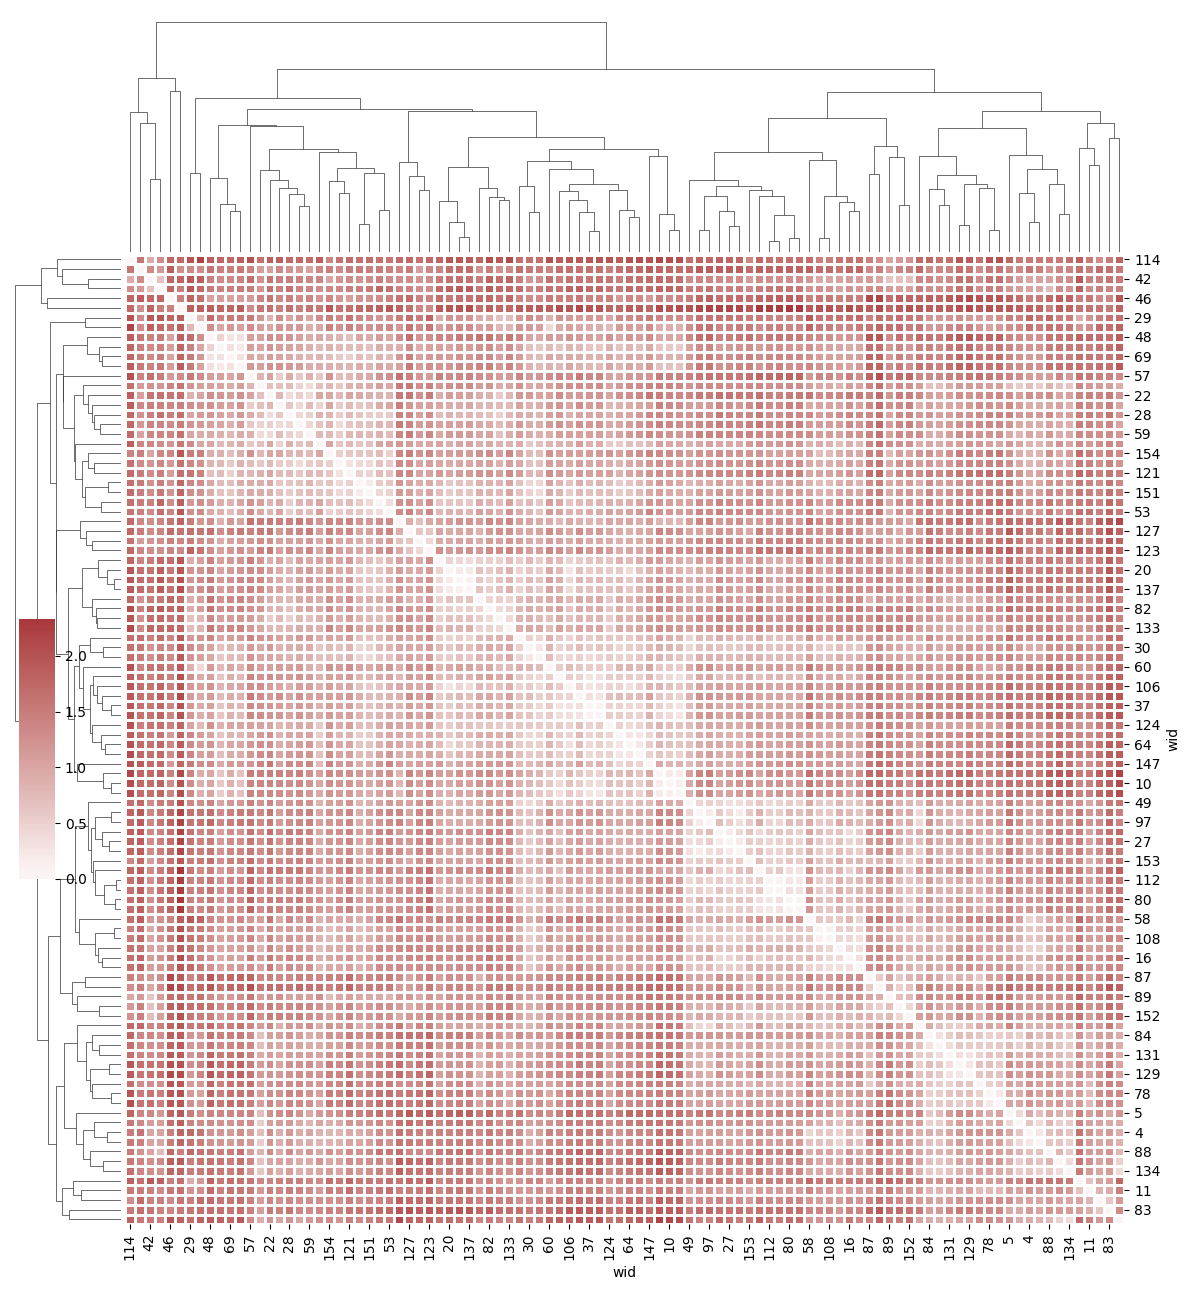

In [23]:
distance_block_df = distance_df.iloc[:100,:100]
g = sns.clustermap(distance_block_df, center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

In [24]:
len(distance_df.columns)

4644

## 3. Further data mining Happiness: How to improve our happiness among marital or single?
- To delve deeper, semantic models are needed, which may require time to select the appropriate one.
- A simpler and intuitive approach is to analyze word frequency.

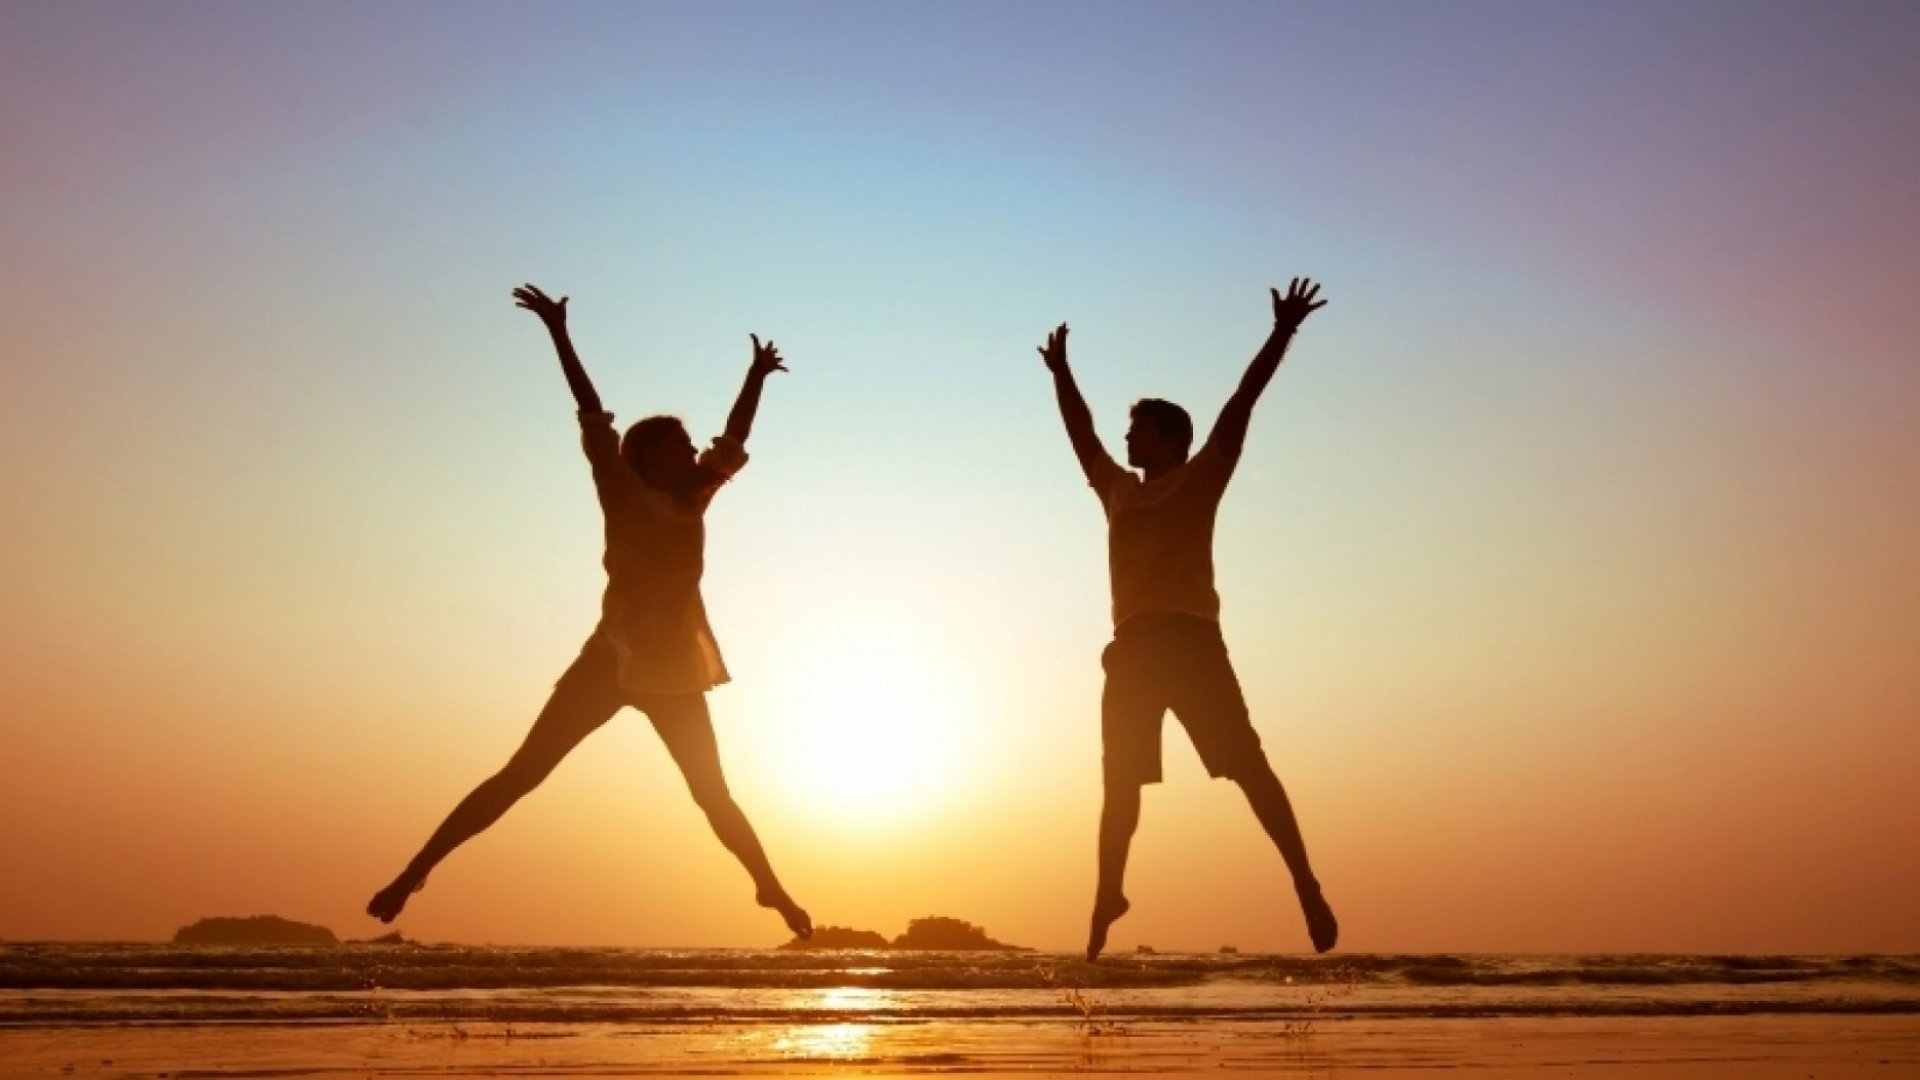

In [4]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/happy_third.jpg"
Image(filename=image_path, width=600, height=600)

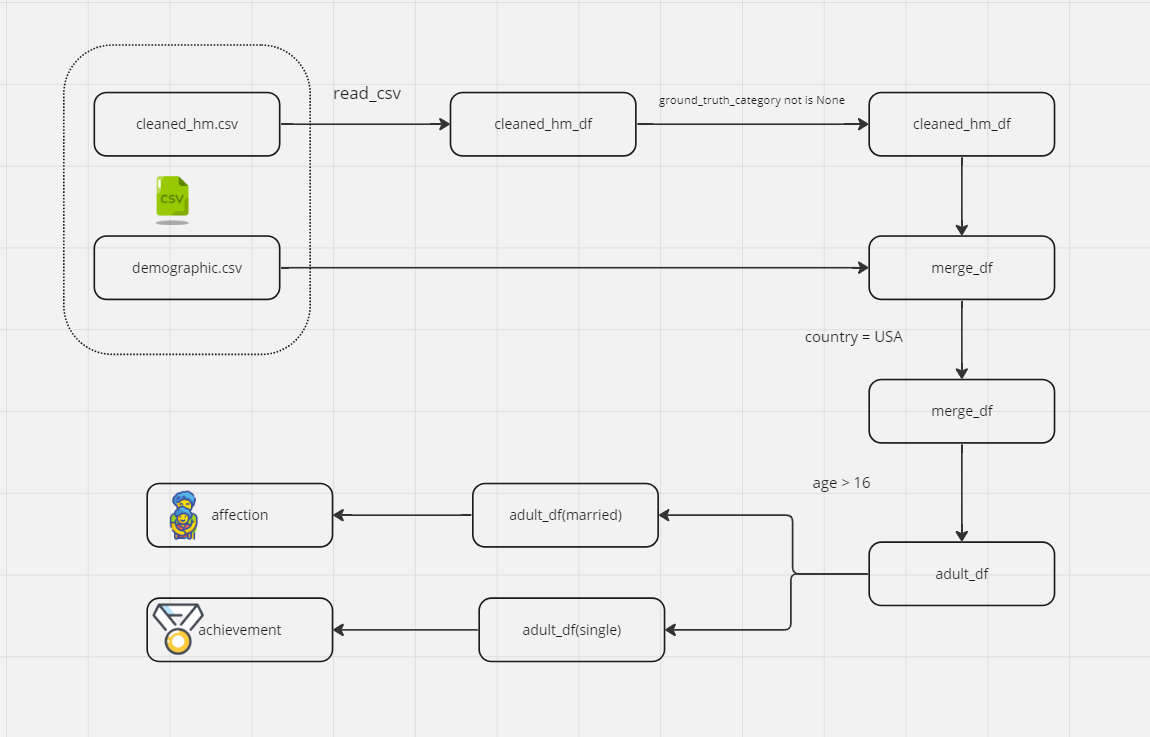

In [2]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/workflow.jpg"
Image(filename=image_path, width=600, height=600)

👷*In the third part, progress is being continued. The final version will finished 1-2 days after* 

🌟*The current idea is to use the previous word cloud to infer the scenario, because the third part is mainly to explore "how", so for example, it is explored that for married people, a possible way to improve happiness is for couples to go home together after get off work. Parents pick up and drop off children after school, and single people may get orders from big customers, promotions and salary increases, social recognition, etc. through the workplace.*

📒*The picture above is the brainstorming flow chart for the third part*

In [3]:
## Still Working ...

## 4. Appendix

### The reason why marital will improve happiness?

In [25]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
cleaned_hm_csv_file = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/data/cleaned_hm.csv"
cleaned_hm_df = pd.read_csv(cleaned_hm_csv_file)

demographic_csv_file = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/data/demographic.csv" 
demographic_df = pd.read_csv(demographic_csv_file)

In [28]:
cleaned_hm_df = cleaned_hm_df.dropna(subset=['ground_truth_category'])

In [29]:
cleaned_hm_df.head()

hmid   wid reflection_period  \
3   27676   206               24h   
5   27678    45               24h   
24  27697   498               24h   
32  27705  5732               24h   
42  27715  2272               24h   

                                          original_hm  \
3   We had a serious talk with some friends of our...   
5                             I meditated last night.   
24  My grandmother start to walk from the bed afte...   
32  I picked my daughter up from the airport and w...   
42        when i received flowers from my best friend   

                                           cleaned_hm  modified  num_sentence  \
3   We had a serious talk with some friends of our...      True             2   
5                             I meditated last night.      True             1   
24  My grandmother start to walk from the bed afte...      True             1   
32  I picked my daughter up from the airport and w...      True             1   
42        when i received flowers from my best friend      True             1   

   ground_truth_category predicted_category  
3                bonding            bonding  
5                leisure            leisure  
24             affection          affection  
32               bonding          affection  
42               bonding            bonding

In [30]:
cleaned_hm_df_merge = cleaned_hm_df.merge(demographic_df,on='wid')

In [31]:
cleaned_hm_df_merge.head()

hmid  wid reflection_period  \
0  27676  206               24h   
1  49534  206               24h   
2  52451  206               24h   
3  84125  206                3m   
4  85125  206                3m   

                                         original_hm  \
0  We had a serious talk with some friends of our...   
1                         I bought my wedding shoes!   
2                  My new watch arrived in the mail!   
3  We watched Rocky Horror Picture Show for the f...   
4                  We played Mario Kart while drunk.   

                                          cleaned_hm  modified  num_sentence  \
0  We had a serious talk with some friends of our...      True             2   
1                         I bought my wedding shoes!      True             1   
2                  My new watch arrived in the mail!      True             1   
3  We watched Rocky Horror Picture Show for the f...      True             1   
4                  We played Mario Kart while drunk.      True             1   

  ground_truth_category predicted_category age country gender  marital  \
0               bonding            bonding  28     DNK      f  married   
1           achievement        achievement  28     DNK      f  married   
2           achievement        achievement  28     DNK      f  married   
3               leisure            leisure  28     DNK      f  married   
4               leisure            leisure  28     DNK      f  married   

  parenthood  
0          n  
1          n  
2          n  
3          n  
4          n

In [32]:
cleaned_hm_adult_cleaned_df = cleaned_hm_df_merge[pd.to_numeric(cleaned_hm_df_merge['age'],errors='coerce').notnull()]
cleaned_hm_adult_cleaned_df['age'] = cleaned_hm_adult_cleaned_df['age'].astype(str).astype(float).astype(int)
cleaned_hm_adult_cleaned_df = cleaned_hm_adult_cleaned_df[cleaned_hm_adult_cleaned_df['age']>30]

/var/folders/x1/cmq6ht1x7ygffd5zpgqj2kv80000gn/T/ipykernel_71323/4083055248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_hm_adult_cleaned_df['age'] = cleaned_hm_adult_cleaned_df['age'].astype(str).astype(float).astype(int)


In [33]:
cleaned_hm_adult_cleaned_df.head()

hmid   wid reflection_period  \
16  27705  5732               24h   
20  27723   389               24h   
21  27923   389               24h   
22  45297   389               24h   
23  83193   389                3m   

                                          original_hm  \
16  I picked my daughter up from the airport and w...   
20                                   I went shopping    
21                  My daughter visited me at evening   
22             I meet my son and ate a lunch with him   
23                     I meet my daughter special one   

                                           cleaned_hm  modified  num_sentence  \
16  I picked my daughter up from the airport and w...      True             1   
20                                   I went shopping       True             1   
21                  My daughter visited me at evening      True             1   
22             I meet my son and ate a lunch with him      True             1   
23                     I meet my daughter special one      True             1   

   ground_truth_category predicted_category  age country gender   marital  \
16               bonding          affection   64     USA      f  divorced   
20               leisure            leisure   61     USA      f   married   
21             affection          affection   61     USA      f   married   
22             affection          affection   61     USA      f   married   
23             affection          affection   61     USA      f   married   

   parenthood  
16          y  
20          y  
21          y  
22          y  
23          y

In [34]:
adult_married_df = cleaned_hm_adult_cleaned_df[cleaned_hm_adult_cleaned_df['marital']=="married"]

In [35]:
adult_married_df.head()

hmid  wid reflection_period                             original_hm  \
20  27723  389               24h                        I went shopping    
21  27923  389               24h       My daughter visited me at evening   
22  45297  389               24h  I meet my son and ate a lunch with him   
23  83193  389                3m          I meet my daughter special one   
24  89903  389                3m                I meet my son girlfriend   

                                cleaned_hm  modified  num_sentence  \
20                        I went shopping       True             1   
21       My daughter visited me at evening      True             1   
22  I meet my son and ate a lunch with him      True             1   
23          I meet my daughter special one      True             1   
24                I meet my son girlfriend      True             1   

   ground_truth_category predicted_category  age country gender  marital  \
20               leisure            leisure   61     USA      f  married   
21             affection          affection   61     USA      f  married   
22             affection          affection   61     USA      f  married   
23             affection          affection   61     USA      f  married   
24             affection          affection   61     USA      f  married   

   parenthood  
20          y  
21          y  
22          y  
23          y  
24          y

In [36]:
adult_married_df.groupby(['ground_truth_category']).agg(['count'])

hmid   wid reflection_period original_hm cleaned_hm  \
                      count count             count       count      count   
ground_truth_category                                                        
achievement            1028  1028              1028        1028       1028   
affection              1706  1706              1706        1706       1706   
bonding                 342   342               342         342        342   
enjoy_the_moment        323   323               323         323        323   
exercise                 37    37                37          37         37   
leisure                 227   227               227         227        227   
nature                   80    80                80          80         80   

                      modified num_sentence predicted_category   age country  \
                         count        count              count count   count   
ground_truth_category                                                          
achievement               1028         1028               1028  1028    1027   
affection                 1706         1706               1706  1706    1704   
bonding                    342          342                342   342     342   
enjoy_the_moment           323          323                323   323     322   
exercise                    37           37                 37    37      36   
leisure                    227          227                227   227     227   
nature                      80           80                 80    80      80   

                      gender marital parenthood  
                       count   count      count  
ground_truth_category                            
achievement             1027    1028       1028  
affection               1704    1706       1704  
bonding                  342     342        342  
enjoy_the_moment         323     323        323  
exercise                  37      37         37  
leisure                  227     227        227  
nature                    80      80         80

<Axes: xlabel='name', ylabel='count'>

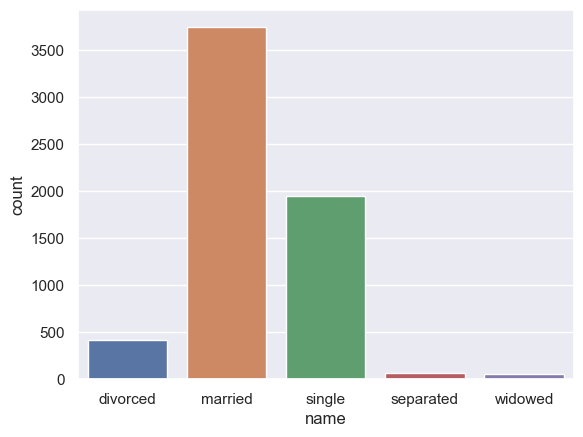

In [37]:
marital_recs = []
sns.set()
for martial_state in cleaned_hm_adult_cleaned_df['marital'].unique():
    rec = {
        "name":martial_state,
        "count":len(cleaned_hm_adult_cleaned_df[cleaned_hm_adult_cleaned_df['marital'] == martial_state])
    }
    marital_recs.append(rec)
marital_state_df = pd.DataFrame(marital_recs)
sns.barplot(data=marital_state_df,x="name",y="count")

<Axes: xlabel='name', ylabel='count'>

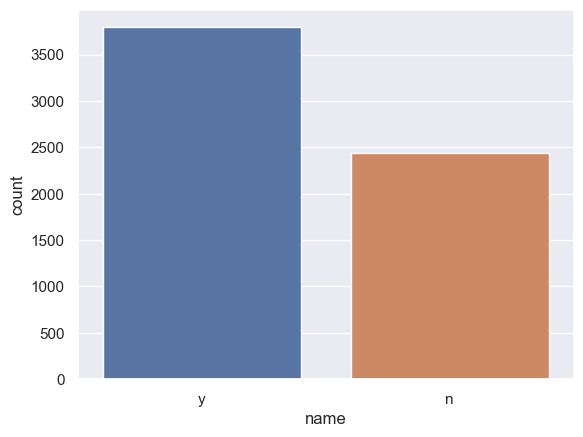

In [38]:
recs_parenthood = []
sns.set()
for parenthood_state in cleaned_hm_adult_cleaned_df['parenthood'].unique():
    rec = {
        "name":parenthood_state,
        "count":len(cleaned_hm_adult_cleaned_df[cleaned_hm_adult_cleaned_df['parenthood'] == parenthood_state])
    }
    recs_parenthood.append(rec)
parenthood_df = pd.DataFrame(recs_parenthood)
sns.barplot(data=parenthood_df,x="name",y="count")

In [39]:
cleaned_hm_adult_married_cleaned_df = cleaned_hm_adult_cleaned_df[cleaned_hm_adult_cleaned_df['marital']=='married']

In [40]:
cleaned_hm_adult_married_cleaned_df.head()

hmid  wid reflection_period                             original_hm  \
20  27723  389               24h                        I went shopping    
21  27923  389               24h       My daughter visited me at evening   
22  45297  389               24h  I meet my son and ate a lunch with him   
23  83193  389                3m          I meet my daughter special one   
24  89903  389                3m                I meet my son girlfriend   

                                cleaned_hm  modified  num_sentence  \
20                        I went shopping       True             1   
21       My daughter visited me at evening      True             1   
22  I meet my son and ate a lunch with him      True             1   
23          I meet my daughter special one      True             1   
24                I meet my son girlfriend      True             1   

   ground_truth_category predicted_category  age country gender  marital  \
20               leisure            leisure   61     USA      f  married   
21             affection          affection   61     USA      f  married   
22             affection          affection   61     USA      f  married   
23             affection          affection   61     USA      f  married   
24             affection          affection   61     USA      f  married   

   parenthood  
20          y  
21          y  
22          y  
23          y  
24          y

<Axes: xlabel='name', ylabel='count'>

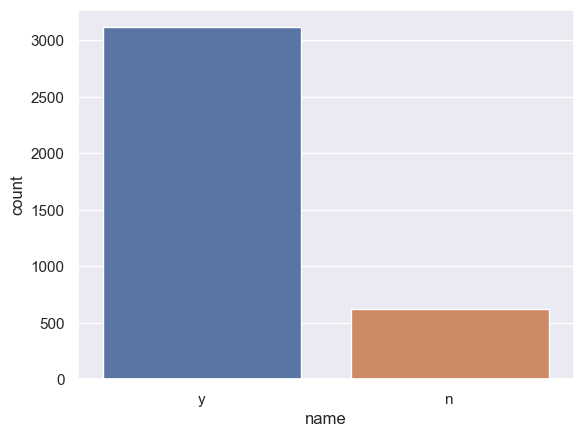

In [41]:
recs_parenthood = []
sns.set()
for parenthood_state in cleaned_hm_adult_married_cleaned_df['parenthood'].unique():
    rec = {
        "name":parenthood_state,
        "count":len(cleaned_hm_adult_married_cleaned_df[cleaned_hm_adult_married_cleaned_df['parenthood'] == parenthood_state])
    }
    recs_parenthood.append(rec)
parenthood_df = pd.DataFrame(recs_parenthood)
sns.barplot(data=parenthood_df,x="name",y="count")

In [42]:
cleaned_hm_adult_married_cleaned_df.head()

hmid  wid reflection_period                             original_hm  \
20  27723  389               24h                        I went shopping    
21  27923  389               24h       My daughter visited me at evening   
22  45297  389               24h  I meet my son and ate a lunch with him   
23  83193  389                3m          I meet my daughter special one   
24  89903  389                3m                I meet my son girlfriend   

                                cleaned_hm  modified  num_sentence  \
20                        I went shopping       True             1   
21       My daughter visited me at evening      True             1   
22  I meet my son and ate a lunch with him      True             1   
23          I meet my daughter special one      True             1   
24                I meet my son girlfriend      True             1   

   ground_truth_category predicted_category  age country gender  marital  \
20               leisure            leisure   61     USA      f  married   
21             affection          affection   61     USA      f  married   
22             affection          affection   61     USA      f  married   
23             affection          affection   61     USA      f  married   
24             affection          affection   61     USA      f  married   

   parenthood  
20          y  
21          y  
22          y  
23          y  
24          y

### Whether the Marital would improve happiness? 

In [43]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
cleaned_hm_csv_file = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/data/cleaned_hm.csv"
cleaned_hm_df = pd.read_csv(cleaned_hm_csv_file)

demographic_csv_file = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/data/demographic.csv" 
demographic_df = pd.read_csv(demographic_csv_file)

In [45]:
cleaned_hm_df = cleaned_hm_df.dropna(subset=['ground_truth_category'])

In [46]:
len(demographic_df)

10844

In [47]:
len(cleaned_hm_df)

14125

In [48]:
cleaned_hm_df.head()

hmid   wid reflection_period  \
3   27676   206               24h   
5   27678    45               24h   
24  27697   498               24h   
32  27705  5732               24h   
42  27715  2272               24h   

                                          original_hm  \
3   We had a serious talk with some friends of our...   
5                             I meditated last night.   
24  My grandmother start to walk from the bed afte...   
32  I picked my daughter up from the airport and w...   
42        when i received flowers from my best friend   

                                           cleaned_hm  modified  num_sentence  \
3   We had a serious talk with some friends of our...      True             2   
5                             I meditated last night.      True             1   
24  My grandmother start to walk from the bed afte...      True             1   
32  I picked my daughter up from the airport and w...      True             1   
42        when i received flowers from my best friend      True             1   

   ground_truth_category predicted_category  
3                bonding            bonding  
5                leisure            leisure  
24             affection          affection  
32               bonding          affection  
42               bonding            bonding

In [49]:
cleaned_hm_df_merge = cleaned_hm_df.merge(demographic_df,on='wid')

In [50]:
len(cleaned_hm_df_merge)

14125

In [51]:
cleaned_hm_df_merge.head()

hmid  wid reflection_period  \
0  27676  206               24h   
1  49534  206               24h   
2  52451  206               24h   
3  84125  206                3m   
4  85125  206                3m   

                                         original_hm  \
0  We had a serious talk with some friends of our...   
1                         I bought my wedding shoes!   
2                  My new watch arrived in the mail!   
3  We watched Rocky Horror Picture Show for the f...   
4                  We played Mario Kart while drunk.   

                                          cleaned_hm  modified  num_sentence  \
0  We had a serious talk with some friends of our...      True             2   
1                         I bought my wedding shoes!      True             1   
2                  My new watch arrived in the mail!      True             1   
3  We watched Rocky Horror Picture Show for the f...      True             1   
4                  We played Mario Kart while drunk.      True             1   

  ground_truth_category predicted_category age country gender  marital  \
0               bonding            bonding  28     DNK      f  married   
1           achievement        achievement  28     DNK      f  married   
2           achievement        achievement  28     DNK      f  married   
3               leisure            leisure  28     DNK      f  married   
4               leisure            leisure  28     DNK      f  married   

  parenthood  
0          n  
1          n  
2          n  
3          n  
4          n

In [52]:
cleaned_hm_df_merge['marital'].unique()

array(['married', 'single', 'divorced', 'separated', 'widowed', nan],
      dtype=object)

In [53]:
cleaned_hm_df_merge['marital'].isna().sum()

22

<Axes: xlabel='name', ylabel='count'>

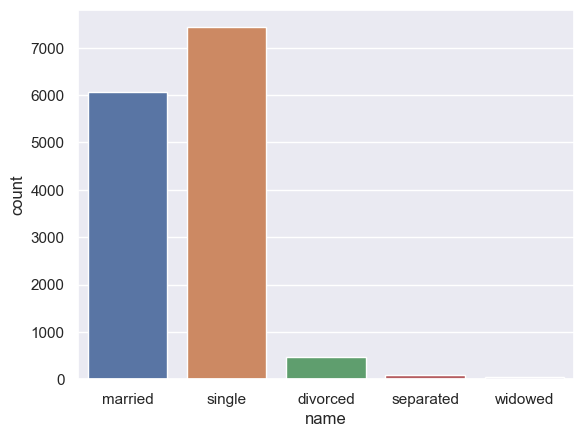

In [59]:
# Initialize an empty list to store records of counts for each marital state
marital_recs = []

# Set the aesthetic style of the plots
sns.set()

# Loop over each unique marital state in the merged dataframe containing cleaned happiness messages
for marital_state in cleaned_hm_df_merge['marital'].unique():
    # Count the number of occurrences for the current marital state
    count = cleaned_hm_df_merge[cleaned_hm_df_merge['marital'] == marital_state].shape[0]
    # Create a dictionary record with the marital state name and its count
    rec = {"name": marital_state, "count": count}
    # Append the record to the list of marital records
    marital_recs.append(rec)

# Convert the list of records into a pandas DataFrame
marital_state_df = pd.DataFrame(marital_recs)

# Use Seaborn to create a bar plot visualizing the frequency of each marital state
sns.barplot(data=marital_state_df, x="name", y="count")


In [61]:
marital_state_df

name  count
0    married   6059
1     single   7431
2   divorced    471
3  separated     84
4    widowed     58
5        NaN      0

In [63]:
marital_state_df['count'].sum()

14103

In [64]:
cleaned_hm_df_merge['parenthood'].unique()

array(['n', 'y', nan], dtype=object)

<Axes: xlabel='name', ylabel='count'>

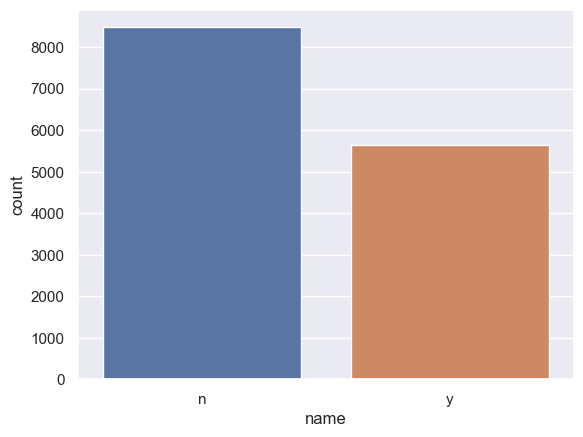

In [65]:
recs_parenthood = []
sns.set()
for parenthood_state in cleaned_hm_df_merge['parenthood'].unique():
    rec = {
        "name":parenthood_state,
        "count":len(cleaned_hm_df_merge[cleaned_hm_df_merge['parenthood'] == parenthood_state])
    }
    recs_parenthood.append(rec)
parenthood_df = pd.DataFrame(recs_parenthood)
sns.barplot(data=parenthood_df,x="name",y="count")

In [68]:
cleaned_hm_adult_df.head()

hmid  wid reflection_period  \
0  27676  206               24h   
1  49534  206               24h   
2  52451  206               24h   
3  84125  206                3m   
4  85125  206                3m   

                                         original_hm  \
0  We had a serious talk with some friends of our...   
1                         I bought my wedding shoes!   
2                  My new watch arrived in the mail!   
3  We watched Rocky Horror Picture Show for the f...   
4                  We played Mario Kart while drunk.   

                                          cleaned_hm  modified  num_sentence  \
0  We had a serious talk with some friends of our...      True             2   
1                         I bought my wedding shoes!      True             1   
2                  My new watch arrived in the mail!      True             1   
3  We watched Rocky Horror Picture Show for the f...      True             1   
4                  We played Mario Kart while drunk.      True             1   

  ground_truth_category predicted_category age country gender  marital  \
0               bonding            bonding  28     DNK      f  married   
1           achievement        achievement  28     DNK      f  married   
2           achievement        achievement  28     DNK      f  married   
3               leisure            leisure  28     DNK      f  married   
4               leisure            leisure  28     DNK      f  married   

  parenthood  
0          n  
1          n  
2          n  
3          n  
4          n

In [70]:
cleaned_hm_adult_df = cleaned_hm_df_merge.dropna(subset=['age'])
# This will print any value that cannot be converted to a float
for value in cleaned_hm_df_merge['age']:
    try:
        float(value)
    except ValueError:
        print(value)

prefer not to say
prefer not to say
prefer not to say
prefer not to say
prefer not to say
prefer not to say
prefer not to say
prefer not to say
prefer not to say
prefer not to say
prefer not to say
prefer not to say
čá


In [73]:
# Replace non-numeric values with NaN
cleaned_hm_df_merge['age'] = pd.to_numeric(cleaned_hm_df_merge['age'], errors='coerce')

# Now you can drop NaN values if that's the chosen approach
cleaned_hm_df_merge = cleaned_hm_df_merge.dropna(subset=['age'])

# Perform the filtering
cleaned_hm_adult_df = cleaned_hm_df_merge[cleaned_hm_df_merge['age'] > 30]


In [74]:
cleaned_hm_adult_cleaned_df = cleaned_hm_adult_df[pd.to_numeric(cleaned_hm_adult_df['age'],errors='coerce').notnull()]


In [75]:
cleaned_hm_adult_cleaned_df['age'] = cleaned_hm_adult_cleaned_df['age'].astype(str).astype(float).astype(int)

In [76]:
cleaned_hm_adult_cleaned_df.head()

hmid   wid reflection_period  \
16  27705  5732               24h   
20  27723   389               24h   
21  27923   389               24h   
22  45297   389               24h   
23  83193   389                3m   

                                          original_hm  \
16  I picked my daughter up from the airport and w...   
20                                   I went shopping    
21                  My daughter visited me at evening   
22             I meet my son and ate a lunch with him   
23                     I meet my daughter special one   

                                           cleaned_hm  modified  num_sentence  \
16  I picked my daughter up from the airport and w...      True             1   
20                                   I went shopping       True             1   
21                  My daughter visited me at evening      True             1   
22             I meet my son and ate a lunch with him      True             1   
23                     I meet my daughter special one      True             1   

   ground_truth_category predicted_category  age country gender   marital  \
16               bonding          affection   64     USA      f  divorced   
20               leisure            leisure   61     USA      f   married   
21             affection          affection   61     USA      f   married   
22             affection          affection   61     USA      f   married   
23             affection          affection   61     USA      f   married   

   parenthood  
16          y  
20          y  
21          y  
22          y  
23          y

In [77]:
cleaned_hm_adult_cleaned_df[cleaned_hm_adult_cleaned_df['age']>30]

hmid   wid reflection_period  \
16      27705  5732               24h   
20      27723   389               24h   
21      27923   389               24h   
22      45297   389               24h   
23      83193   389                3m   
...       ...   ...               ...   
14116  128565  5216               24h   
14118  128597  5826               24h   
14119  128609  6437               24h   
14121  128631  8937               24h   
14123  128758  4428               24h   

                                             original_hm  \
16     I picked my daughter up from the airport and w...   
20                                      I went shopping    
21                     My daughter visited me at evening   
22                I meet my son and ate a lunch with him   
23                        I meet my daughter special one   
...                                                  ...   
14116                           I saw a romantic comedy.   
14118  I found a little extra money in one of my onli...   
14119  After diner I had a nice family walk with my c...   
14121  My best out of town friend called to announce ...   
14123  Yesterday my relations came to my house. That ...   

                                              cleaned_hm  modified  \
16     I picked my daughter up from the airport and w...      True   
20                                      I went shopping       True   
21                     My daughter visited me at evening      True   
22                I meet my son and ate a lunch with him      True   
23                        I meet my daughter special one      True   
...                                                  ...       ...   
14116                           I saw a romantic comedy.      True   
14118  I found a little extra money in one of my onli...      True   
14119  After diner I had a nice family walk with my c...      True   
14121  My best out of town friend called to announce ...      True   
14123  Yesterday my relations came to my house. That ...      True   

       num_sentence ground_truth_category predicted_category  age country  \
16                1               bonding          affection   64     USA   
20                1               leisure            leisure   61     USA   
21                1             affection          affection   61     USA   
22                1             affection          affection   61     USA   
23                1             affection          affection   61     USA   
...             ...                   ...                ...  ...     ...   
14116             1               leisure            leisure   40     USA   
14118             1           achievement        achievement   44     USA   
14119             1             affection          affection   31     LVA   
14121             1               bonding            bonding   61     USA   
14123             2             affection          affection   34     IND   

      gender   marital parenthood  
16         f  divorced          y  
20         f   married          y  
21         f   married          y  
22         f   married          y  
23         f   married          y  
...      ...       ...        ...  
14116      m    single          y  
14118      m    single          n  
14119      m   married          y  
14121      m    single          n  
14123      f   married          y  

[6237 rows x 14 columns]

In [78]:
len(cleaned_hm_adult_cleaned_df)

6237

In [79]:
cleaned_hm_adult_cleaned_df = cleaned_hm_adult_cleaned_df[cleaned_hm_adult_cleaned_df['age']>30]

In [80]:
len(cleaned_hm_adult_cleaned_df)

6237

### Classification by country

<Axes: xlabel='name', ylabel='count'>

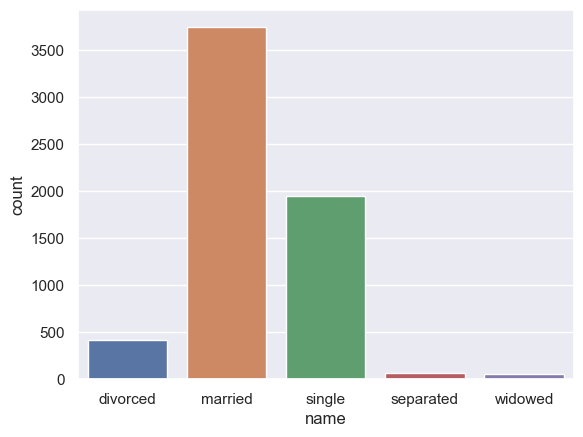

In [81]:
marital_recs = []
sns.set()
for martial_state in cleaned_hm_adult_cleaned_df['marital'].unique():
    rec = {
        "name":martial_state,
        "count":len(cleaned_hm_adult_cleaned_df[cleaned_hm_adult_cleaned_df['marital'] == martial_state])
    }
    marital_recs.append(rec)
marital_state_df = pd.DataFrame(marital_recs)
sns.barplot(data=marital_state_df,x="name",y="count")

<Axes: xlabel='name', ylabel='count'>

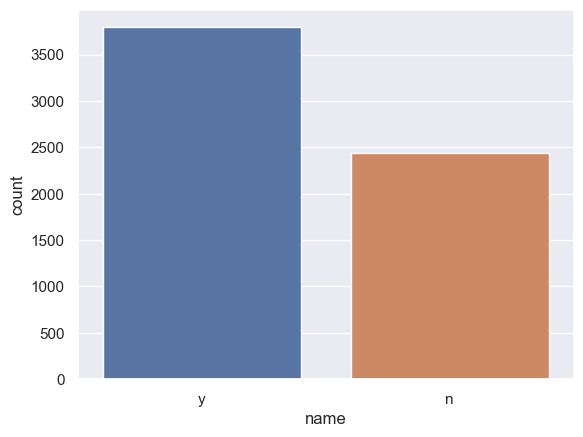

In [82]:
recs_parenthood = []
sns.set()
for parenthood_state in cleaned_hm_adult_cleaned_df['parenthood'].unique():
    rec = {
        "name":parenthood_state,
        "count":len(cleaned_hm_adult_cleaned_df[cleaned_hm_adult_cleaned_df['parenthood'] == parenthood_state])
    }
    recs_parenthood.append(rec)
parenthood_df = pd.DataFrame(recs_parenthood)
sns.barplot(data=parenthood_df,x="name",y="count")

In [83]:
cleaned_hm_adult_married_cleaned_df = cleaned_hm_adult_cleaned_df[cleaned_hm_adult_cleaned_df['marital']=='married']

In [84]:
cleaned_hm_adult_married_cleaned_df.head()

hmid  wid reflection_period                             original_hm  \
20  27723  389               24h                        I went shopping    
21  27923  389               24h       My daughter visited me at evening   
22  45297  389               24h  I meet my son and ate a lunch with him   
23  83193  389                3m          I meet my daughter special one   
24  89903  389                3m                I meet my son girlfriend   

                                cleaned_hm  modified  num_sentence  \
20                        I went shopping       True             1   
21       My daughter visited me at evening      True             1   
22  I meet my son and ate a lunch with him      True             1   
23          I meet my daughter special one      True             1   
24                I meet my son girlfriend      True             1   

   ground_truth_category predicted_category  age country gender  marital  \
20               leisure            leisure   61     USA      f  married   
21             affection          affection   61     USA      f  married   
22             affection          affection   61     USA      f  married   
23             affection          affection   61     USA      f  married   
24             affection          affection   61     USA      f  married   

   parenthood  
20          y  
21          y  
22          y  
23          y  
24          y

<Axes: xlabel='name', ylabel='count'>

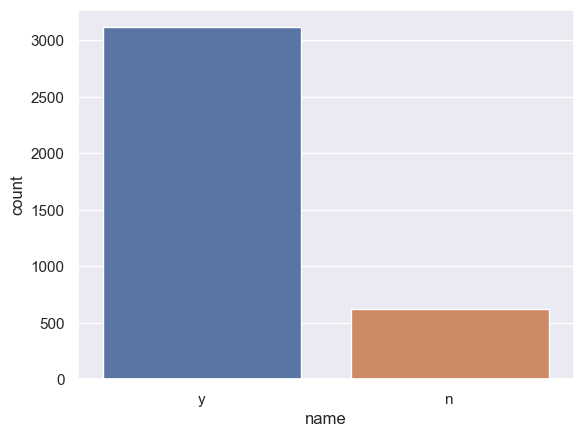

In [85]:
recs_parenthood = []
sns.set()
for parenthood_state in cleaned_hm_adult_married_cleaned_df['parenthood'].unique():
    rec = {
        "name":parenthood_state,
        "count":len(cleaned_hm_adult_married_cleaned_df[cleaned_hm_adult_married_cleaned_df['parenthood'] == parenthood_state])
    }
    recs_parenthood.append(rec)
parenthood_df = pd.DataFrame(recs_parenthood)
sns.barplot(data=parenthood_df,x="name",y="count")

In [86]:
cleaned_hm_adult_married_cleaned_df.head()

hmid  wid reflection_period                             original_hm  \
20  27723  389               24h                        I went shopping    
21  27923  389               24h       My daughter visited me at evening   
22  45297  389               24h  I meet my son and ate a lunch with him   
23  83193  389                3m          I meet my daughter special one   
24  89903  389                3m                I meet my son girlfriend   

                                cleaned_hm  modified  num_sentence  \
20                        I went shopping       True             1   
21       My daughter visited me at evening      True             1   
22  I meet my son and ate a lunch with him      True             1   
23          I meet my daughter special one      True             1   
24                I meet my son girlfriend      True             1   

   ground_truth_category predicted_category  age country gender  marital  \
20               leisure            leisure   61     USA      f  married   
21             affection          affection   61     USA      f  married   
22             affection          affection   61     USA      f  married   
23             affection          affection   61     USA      f  married   
24             affection          affection   61     USA      f  married   

   parenthood  
20          y  
21          y  
22          y  
23          y  
24          y

### Other Relative Exploration

In [88]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [91]:
chm_csv_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/data/cleaned_hm.csv"
demographic_csv_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/data/demographic.csv"

In [92]:
chm_df = pd.read_csv(chm_csv_path)
chm_df.head()

hmid   wid reflection_period  \
0  27673  2053               24h   
1  27674     2               24h   
2  27675  1936               24h   
3  27676   206               24h   
4  27677  6227               24h   

                                         original_hm  \
0  I went on a successful date with someone I fel...   
1  I was happy when my son got 90% marks in his e...   
2       I went to the gym this morning and did yoga.   
3  We had a serious talk with some friends of our...   
4  I went with grandchildren to butterfly display...   

                                          cleaned_hm  modified  num_sentence  \
0  I went on a successful date with someone I fel...      True             1   
1  I was happy when my son got 90% marks in his e...      True             1   
2       I went to the gym this morning and did yoga.      True             1   
3  We had a serious talk with some friends of our...      True             2   
4  I went with grandchildren to butterfly display...      True             1   

  ground_truth_category predicted_category  
0                   NaN          affection  
1                   NaN          affection  
2                   NaN           exercise  
3               bonding            bonding  
4                   NaN          affection

In [93]:
demographic_df = pd.read_csv(demographic_csv_path)
demographic_df.head()

wid   age country gender  marital parenthood
0    1  37.0     USA      m  married          y
1    2  29.0     IND      m  married          y
2    3    25     IND      m   single          n
3    4    32     USA      m  married          y
4    5    29     USA      m  married          y

In [94]:
merge_df = demographic_df.merge(chm_df,on='wid')
merge_df.head()

wid   age country gender  marital parenthood   hmid reflection_period  \
0    1  37.0     USA      m  married          y  27854               24h   
1    1  37.0     USA      m  married          y  28054               24h   
2    1  37.0     USA      m  married          y  28254               24h   
3    1  37.0     USA      m  married          y  28489               24h   
4    1  37.0     USA      m  married          y  28991               24h   

                                         original_hm  \
0  My wife and i are celebrating our ten year ann...   
1  My mother called out of the blue to tell me ho...   
2  Today i took the day off from my part time job...   
3            I just got a $21 bonus on a mturk task!   
4  My wife cooked me a surprise dinner to take to...   

                                          cleaned_hm  modified  num_sentence  \
0  My wife and i are celebrating our ten year ann...      True             1   
1  My mother called out of the blue to tell me ho...      True             1   
2  Today i took the day off from my part time job...      True             1   
3            I just got a $21 bonus on a mturk task!      True             1   
4  My wife cooked me a surprise dinner to take to...      True             1   

  ground_truth_category predicted_category  
0                   NaN          affection  
1             affection          affection  
2                   NaN          affection  
3                   NaN        achievement  
4                   NaN          affection

In [95]:
merge_df.drop_duplicates(subset=['wid'],inplace=True)
merge_df.head()

wid   age country gender  marital parenthood   hmid reflection_period  \
0      1  37.0     USA      m  married          y  27854               24h   
90     2  29.0     IND      m  married          y  27674               24h   
174    3    25     IND      m   single          n  27681               24h   
258    4    32     USA      m  married          y  27714               24h   
354    5    29     USA      m  married          y  27838               24h   

                                           original_hm  \
0    My wife and i are celebrating our ten year ann...   
90   I was happy when my son got 90% marks in his e...   
174            YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED   
258  I received an award for my work on a tough loa...   
354  I was able to play my video game that I enjoy ...   

                                            cleaned_hm  modified  \
0    My wife and i are celebrating our ten year ann...      True   
90   I was happy when my son got 90% marks in his e...      True   
174            YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED      True   
258  I received an award for my work on a tough loa...      True   
354  I was able to play my video game that I enjoy ...      True   

     num_sentence ground_truth_category predicted_category  
0               1                   NaN          affection  
90              1                   NaN          affection  
174             1                   NaN   enjoy_the_moment  
258             1                   NaN        achievement  
354             1               leisure            leisure

In [96]:
merge_df = merge_df[['wid','age','country','gender','marital','parenthood','ground_truth_category','predicted_category']]

In [97]:
merge_df.head()

wid   age country gender  marital parenthood ground_truth_category  \
0      1  37.0     USA      m  married          y                   NaN   
90     2  29.0     IND      m  married          y                   NaN   
174    3    25     IND      m   single          n                   NaN   
258    4    32     USA      m  married          y                   NaN   
354    5    29     USA      m  married          y               leisure   

    predicted_category  
0            affection  
90           affection  
174   enjoy_the_moment  
258        achievement  
354            leisure

In [98]:
merge_df['country'].unique()

array(['USA', 'IND', 'VNM', 'THA', 'GBR', 'SRB', 'BGR', 'BRA', 'BGD',
       'CAN', 'PRT', 'PHL', 'VEN', 'MKD', 'DOM', 'DNK', 'IDN', 'AUS',
       'URY', 'JAM', 'EGY', 'DEU', 'KEN', 'MDA', 'IRL', 'NGA', 'ALB',
       'MEX', 'TTO', 'KWT', 'RUS', 'LTU', 'PRI', 'SWE', 'PER', 'PAK',
       'TUR', 'FRA', 'ARE', 'COL', 'GRC', 'ROU', 'ARM', 'MAC', 'SGP',
       'UGA', 'POL', 'NIC', 'JPN', 'ESP', 'TWN', 'FIN', 'ITA', 'GHA',
       'AUT', 'NPL', 'NZL', 'NLD', 'KOR', 'LKA', 'KNA', 'ZAF', 'BEL',
       'ISL', 'DZA', 'AFG', 'GMB', nan, 'ASM', 'MYS', 'CZE', 'MLT', 'SVN',
       'UMI', 'ARG', 'SAU', 'EST', 'ECU', 'ZMB', 'CHL', 'MAR', 'ISR',
       'LVA', 'KAZ', 'NOR', 'CRI', 'BRB', 'HRV', 'ETH', 'TCA', 'BHS',
       'VIR', 'GTM', 'IRQ', 'HKG', 'MUS', 'TUN', 'SUR', 'SLV', 'CYP',
       'UKR'], dtype=object)

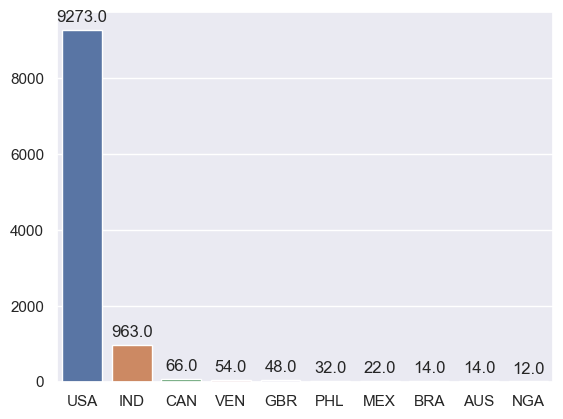

In [99]:
country_series = merge_df['country'].value_counts()[:10]
# country_series
sns.set()
barplot  = sns.barplot(x=country_series.index,y=country_series.values)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

In [100]:
merge_country_df = merge_df[merge_df['country'] == 'USA']

In [101]:
merge_country_df.head()

wid   age country gender  marital parenthood ground_truth_category  \
0      1  37.0     USA      m  married          y                   NaN   
258    4    32     USA      m  married          y                   NaN   
354    5    29     USA      m  married          y               leisure   
510    7    34     USA      m  married          y           achievement   
678    9    61     USA      f  married          y                   NaN   

    predicted_category  
0            affection  
258        achievement  
354            leisure  
510        achievement  
678          affection

In [102]:
merge_country_df['age'] = pd.to_numeric(merge_country_df['age'], errors='coerce')

/var/folders/x1/cmq6ht1x7ygffd5zpgqj2kv80000gn/T/ipykernel_71323/1739328044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_country_df['age'] = pd.to_numeric(merge_country_df['age'], errors='coerce')


In [103]:
merge_country_df['age'] = merge_country_df['age'].fillna(0).astype(int)

/var/folders/x1/cmq6ht1x7ygffd5zpgqj2kv80000gn/T/ipykernel_71323/813599853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_country_df['age'] = merge_country_df['age'].fillna(0).astype(int)


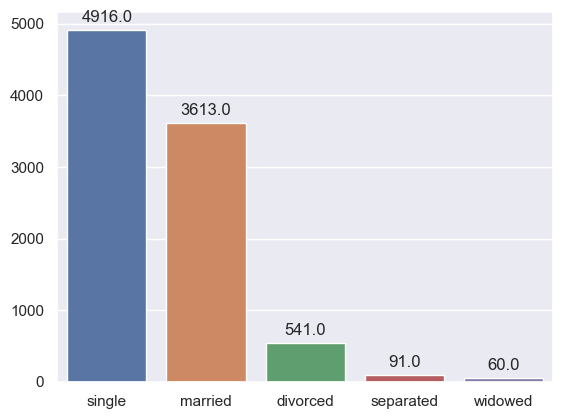

In [104]:
marital_series = merge_country_df[merge_country_df['age']>16]['marital'].value_counts()
barplot  = sns.barplot(x=marital_series.index,y=marital_series.values)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

In [105]:
age_gt_16_df = merge_country_df[merge_country_df['age']>16]

In [106]:
age_gt_16_df.head()

wid  age country gender  marital parenthood ground_truth_category  \
0      1   37     USA      m  married          y                   NaN   
258    4   32     USA      m  married          y                   NaN   
354    5   29     USA      m  married          y               leisure   
510    7   34     USA      m  married          y           achievement   
678    9   61     USA      f  married          y                   NaN   

    predicted_category  
0            affection  
258        achievement  
354            leisure  
510        achievement  
678          affection

In [107]:
bins = [16, 20, 25, 30,35,40,45,50,55,60]
labels = ['16-20', '21-25', '26-30','31-35', '36-40', '41-45','46-50', '51-55', '56-60']
age_gt_16_df['range'] = pd.cut(age_gt_16_df['age'], bins=bins, labels=labels)

/var/folders/x1/cmq6ht1x7ygffd5zpgqj2kv80000gn/T/ipykernel_71323/2921349568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_gt_16_df['range'] = pd.cut(age_gt_16_df['age'], bins=bins, labels=labels)


In [108]:
age_gt_16_df.head()

wid  age country gender  marital parenthood ground_truth_category  \
0      1   37     USA      m  married          y                   NaN   
258    4   32     USA      m  married          y                   NaN   
354    5   29     USA      m  married          y               leisure   
510    7   34     USA      m  married          y           achievement   
678    9   61     USA      f  married          y                   NaN   

    predicted_category  range  
0            affection  36-40  
258        achievement  31-35  
354            leisure  26-30  
510        achievement  31-35  
678          affection    NaN

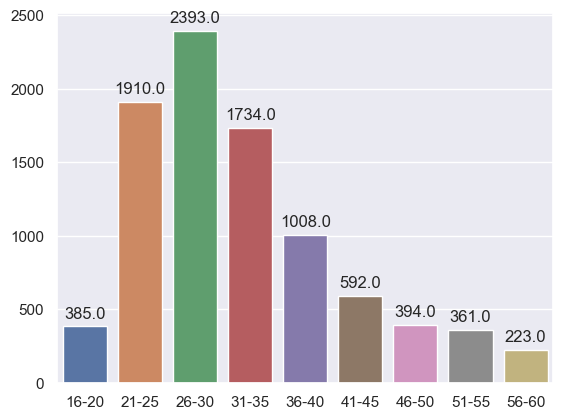

In [109]:
range_count = age_gt_16_df['range'].value_counts()
barplot  = sns.barplot(x=range_count.index,y=range_count.values)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

In [110]:
married_range_count = age_gt_16_df[age_gt_16_df['marital']=='married']['range'].value_counts()

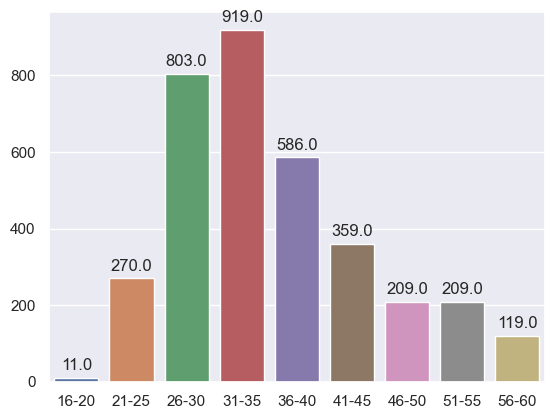

In [111]:
barplot  = sns.barplot(x=married_range_count.index,y=married_range_count.values)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')


In [112]:
sinle_range_count = age_gt_16_df[age_gt_16_df['marital']=='single']['range'].value_counts()

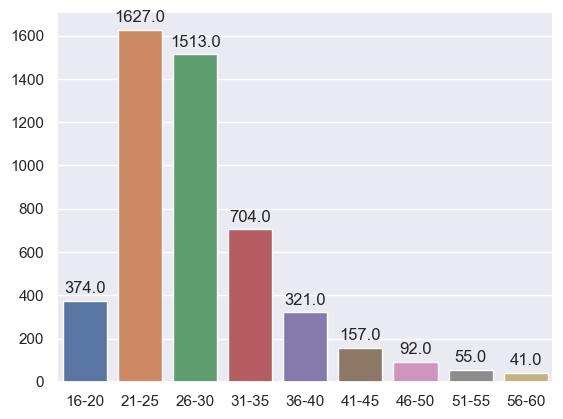

In [113]:
barplot  = sns.barplot(x=sinle_range_count.index,y=sinle_range_count.values)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

In [114]:
single_df = age_gt_16_df[age_gt_16_df['marital']=='single']
single_df

wid  age country gender marital parenthood ground_truth_category  \
765        10   27     USA      m  single          n                   NaN   
936        12   25     USA      f  single          n                   NaN   
1239       16   35     USA      m  single          n                   NaN   
1302       17   30     USA      m  single          n                   NaN   
1380       18   30     USA      m  single          n                   NaN   
...       ...  ...     ...    ...     ...        ...                   ...   
100517  13834   22     USA      m  single          n                   NaN   
100520  13835   25     USA      m  single          n                   NaN   
100523  13836   31     USA      m  single          y                   NaN   
100526  13837   22     USA      f  single          n      enjoy_the_moment   
100532  13839   24     USA      f  single          y                   NaN   

       predicted_category  range  
765              exercise  26-30  
936             affection  21-25  
1239            affection  31-35  
1302            affection  26-30  
1380     enjoy_the_moment  26-30  
...                   ...    ...  
100517          affection  21-25  
100520            bonding  21-25  
100523        achievement  31-35  
100526   enjoy_the_moment  21-25  
100532          affection  21-25  

[4916 rows x 9 columns]

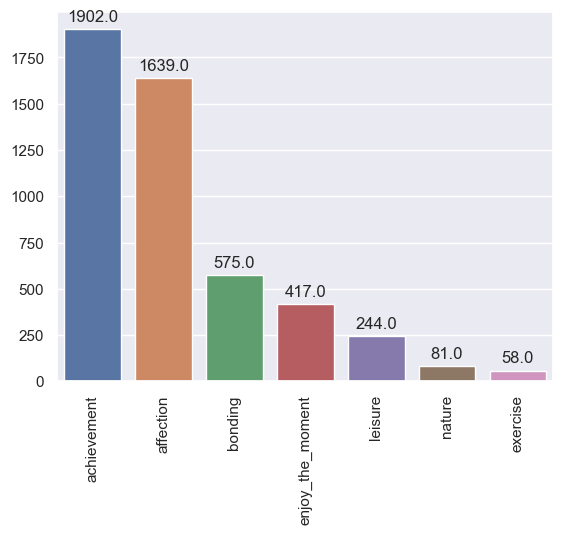

In [115]:
single_series = single_df['predicted_category'].value_counts()
barplot  = sns.barplot(x=single_series.index,y=single_series.values)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

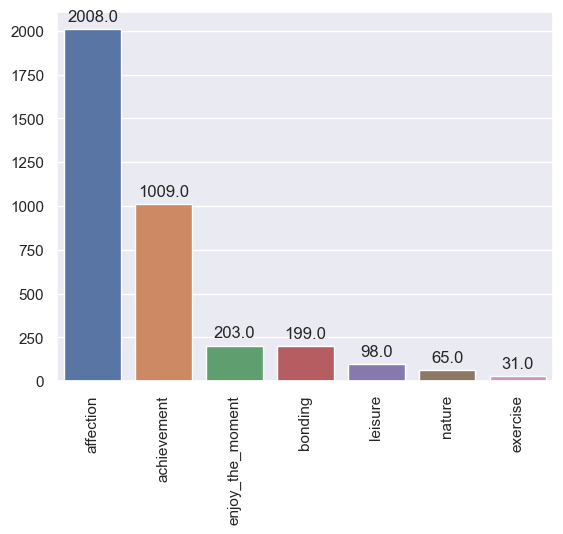

In [116]:
married_df = age_gt_16_df[age_gt_16_df['marital']=='married']
married_series = married_df['predicted_category'].value_counts()
barplot  = sns.barplot(x=married_series.index,y=married_series.values)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

In [117]:
sns.set_theme(style="whitegrid")
married_df['value'] = 1
married_df.head()

/var/folders/x1/cmq6ht1x7ygffd5zpgqj2kv80000gn/T/ipykernel_71323/1074539863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  married_df['value'] = 1


wid  age country gender  marital parenthood ground_truth_category  \
0      1   37     USA      m  married          y                   NaN   
258    4   32     USA      m  married          y                   NaN   
354    5   29     USA      m  married          y               leisure   
510    7   34     USA      m  married          y           achievement   
678    9   61     USA      f  married          y                   NaN   

    predicted_category  range  value  
0            affection  36-40      1  
258        achievement  31-35      1  
354            leisure  26-30      1  
510        achievement  31-35      1  
678          affection    NaN      1

/var/folders/x1/cmq6ht1x7ygffd5zpgqj2kv80000gn/T/ipykernel_71323/283923920.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_grouped_df = married_df.groupby(['gender','predicted_category']).sum().reset_index()


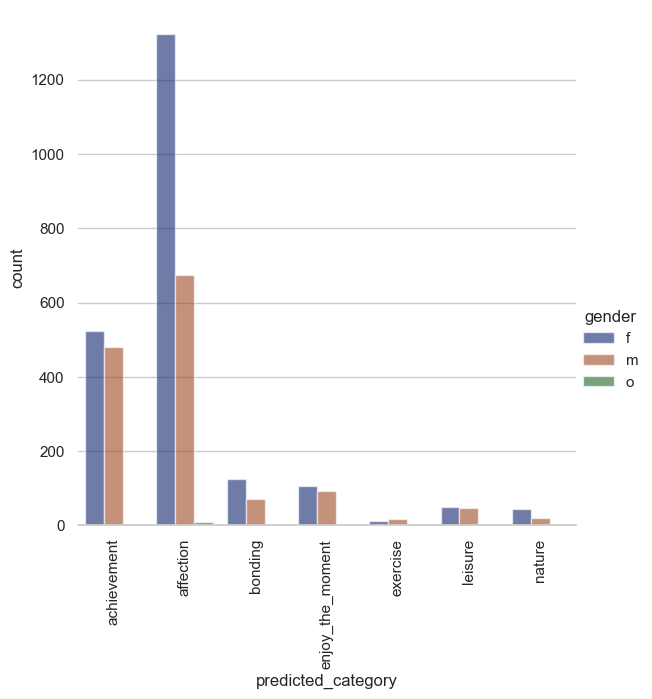

In [123]:
category_grouped_df = married_df.groupby(['gender','predicted_category']).sum().reset_index()
g = sns.catplot(
    x='predicted_category', 
    y='value', 
    hue='gender', 
    data=category_grouped_df, 
    kind='bar',
     palette="dark", alpha=.6, height=6,
)

g.despine(left=True)
g.set_axis_labels("predicted_category", "count")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

In [124]:
married_df

wid  age country gender  marital parenthood ground_truth_category  \
0           1   37     USA      m  married          y                   NaN   
258         4   32     USA      m  married          y                   NaN   
354         5   29     USA      m  married          y               leisure   
510         7   34     USA      m  married          y           achievement   
678         9   61     USA      f  married          y                   NaN   
...       ...  ...     ...    ...      ...        ...                   ...   
100493  13822   32     USA      f  married          n                   NaN   
100502  13828   29     USA      m  married          y                   NaN   
100511  13832   34     USA      f  married          y                   NaN   
100514  13833   31     USA      m  married          y             affection   
100529  13838   38     USA      f  married          y                   NaN   

       predicted_category  range  value  
0               affection  36-40      1  
258           achievement  31-35      1  
354               leisure  26-30      1  
510           achievement  31-35      1  
678             affection    NaN      1  
...                   ...    ...    ...  
100493          affection  31-35      1  
100502          affection  26-30      1  
100511          affection  31-35      1  
100514          affection  31-35      1  
100529   enjoy_the_moment  36-40      1  

[3613 rows x 10 columns]

In [125]:
single_df['value'] = 1
single_df

/var/folders/x1/cmq6ht1x7ygffd5zpgqj2kv80000gn/T/ipykernel_71323/3356902141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_df['value'] = 1


wid  age country gender marital parenthood ground_truth_category  \
765        10   27     USA      m  single          n                   NaN   
936        12   25     USA      f  single          n                   NaN   
1239       16   35     USA      m  single          n                   NaN   
1302       17   30     USA      m  single          n                   NaN   
1380       18   30     USA      m  single          n                   NaN   
...       ...  ...     ...    ...     ...        ...                   ...   
100517  13834   22     USA      m  single          n                   NaN   
100520  13835   25     USA      m  single          n                   NaN   
100523  13836   31     USA      m  single          y                   NaN   
100526  13837   22     USA      f  single          n      enjoy_the_moment   
100532  13839   24     USA      f  single          y                   NaN   

       predicted_category  range  value  
765              exercise  26-30      1  
936             affection  21-25      1  
1239            affection  31-35      1  
1302            affection  26-30      1  
1380     enjoy_the_moment  26-30      1  
...                   ...    ...    ...  
100517          affection  21-25      1  
100520            bonding  21-25      1  
100523        achievement  31-35      1  
100526   enjoy_the_moment  21-25      1  
100532          affection  21-25      1  

[4916 rows x 10 columns]

In [126]:
single_df_grp =single_df.groupby(['predicted_category'])['value'].sum()
single_df_grp

predicted_category
achievement         1902
affection           1639
bonding              575
enjoy_the_moment     417
exercise              58
leisure              244
nature                81
Name: value, dtype: int64

In [127]:
married_df_grp = married_df.groupby(['predicted_category'])['value'].sum()
married_df_grp.values

array([1009, 2008,  199,  203,   31,   98,   65])

## 3. How to improve happniess among the marital and singel?

### Analysis of the Sources of Marital Happiness

In [128]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
cleaned_hm_csv_file = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/data/cleaned_hm.csv"
cleaned_hm_df = pd.read_csv(cleaned_hm_csv_file)

demographic_csv_file = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/data/demographic.csv" 
demographic_df = pd.read_csv(demographic_csv_file)

In [131]:
cleaned_hm_df.head()


hmid   wid reflection_period  \
0  27673  2053               24h   
1  27674     2               24h   
2  27675  1936               24h   
3  27676   206               24h   
4  27677  6227               24h   

                                         original_hm  \
0  I went on a successful date with someone I fel...   
1  I was happy when my son got 90% marks in his e...   
2       I went to the gym this morning and did yoga.   
3  We had a serious talk with some friends of our...   
4  I went with grandchildren to butterfly display...   

                                          cleaned_hm  modified  num_sentence  \
0  I went on a successful date with someone I fel...      True             1   
1  I was happy when my son got 90% marks in his e...      True             1   
2       I went to the gym this morning and did yoga.      True             1   
3  We had a serious talk with some friends of our...      True             2   
4  I went with grandchildren to butterfly display...      True             1   

  ground_truth_category predicted_category  
0                   NaN          affection  
1                   NaN          affection  
2                   NaN           exercise  
3               bonding            bonding  
4                   NaN          affection

In [132]:
cleaned_hm_df = cleaned_hm_df.dropna(subset=['ground_truth_category'])

In [133]:
merged_df = demographic_df.merge(cleaned_hm_df,on='wid')
merged_df.head()

wid   age country gender  marital parenthood   hmid reflection_period  \
0    1  37.0     USA      m  married          y  28054               24h   
1    1  37.0     USA      m  married          y  57637               24h   
2    1  37.0     USA      m  married          y  64498                3m   
3    1  37.0     USA      m  married          y  80306                3m   
4    1  37.0     USA      m  married          y  88307                3m   

                                         original_hm  \
0  My mother called out of the blue to tell me ho...   
1  I got to take the day off from my part time jo...   
2       my son had a great time on his 8th birthday.   
3  I got to have a three day weekend which i spen...   
4  My fiance proposed to me in front of my family...   

                                          cleaned_hm  modified  num_sentence  \
0  My mother called out of the blue to tell me ho...      True             1   
1  I got to take the day off from my part time jo...      True             1   
2       my son had a great time on his 8th birthday.      True             1   
3  I got to have a three day weekend which i spen...      True             1   
4  My fiance proposed to me in front of my family...      True             1   

  ground_truth_category predicted_category  
0             affection          affection  
1             affection          affection  
2             affection          affection  
3             affection          affection  
4             affection          affection

In [134]:
merged_df = merged_df[merged_df['country']=='USA']

In [135]:
merged_df['age'] = pd.to_numeric(merged_df['age'], errors='coerce')
merged_df['age'] = merged_df['age'].fillna(0).astype(int)
adult_df = merged_df[merged_df['age']>16]

In [136]:
married_df = adult_df[adult_df['marital'] == 'married'] 

In [137]:
married_df.head()

wid  age country gender  marital parenthood   hmid reflection_period  \
0    1   37     USA      m  married          y  28054               24h   
1    1   37     USA      m  married          y  57637               24h   
2    1   37     USA      m  married          y  64498                3m   
3    1   37     USA      m  married          y  80306                3m   
4    1   37     USA      m  married          y  88307                3m   

                                         original_hm  \
0  My mother called out of the blue to tell me ho...   
1  I got to take the day off from my part time jo...   
2       my son had a great time on his 8th birthday.   
3  I got to have a three day weekend which i spen...   
4  My fiance proposed to me in front of my family...   

                                          cleaned_hm  modified  num_sentence  \
0  My mother called out of the blue to tell me ho...      True             1   
1  I got to take the day off from my part time jo...      True             1   
2       my son had a great time on his 8th birthday.      True             1   
3  I got to have a three day weekend which i spen...      True             1   
4  My fiance proposed to me in front of my family...      True             1   

  ground_truth_category predicted_category  
0             affection          affection  
1             affection          affection  
2             affection          affection  
3             affection          affection  
4             affection          affection

In [138]:
married_df['value'] = 1

/var/folders/x1/cmq6ht1x7ygffd5zpgqj2kv80000gn/T/ipykernel_71323/430985916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  married_df['value'] = 1


In [139]:
married_df.head()

wid  age country gender  marital parenthood   hmid reflection_period  \
0    1   37     USA      m  married          y  28054               24h   
1    1   37     USA      m  married          y  57637               24h   
2    1   37     USA      m  married          y  64498                3m   
3    1   37     USA      m  married          y  80306                3m   
4    1   37     USA      m  married          y  88307                3m   

                                         original_hm  \
0  My mother called out of the blue to tell me ho...   
1  I got to take the day off from my part time jo...   
2       my son had a great time on his 8th birthday.   
3  I got to have a three day weekend which i spen...   
4  My fiance proposed to me in front of my family...   

                                          cleaned_hm  modified  num_sentence  \
0  My mother called out of the blue to tell me ho...      True             1   
1  I got to take the day off from my part time jo...      True             1   
2       my son had a great time on his 8th birthday.      True             1   
3  I got to have a three day weekend which i spen...      True             1   
4  My fiance proposed to me in front of my family...      True             1   

  ground_truth_category predicted_category  value  
0             affection          affection      1  
1             affection          affection      1  
2             affection          affection      1  
3             affection          affection      1  
4             affection          affection      1

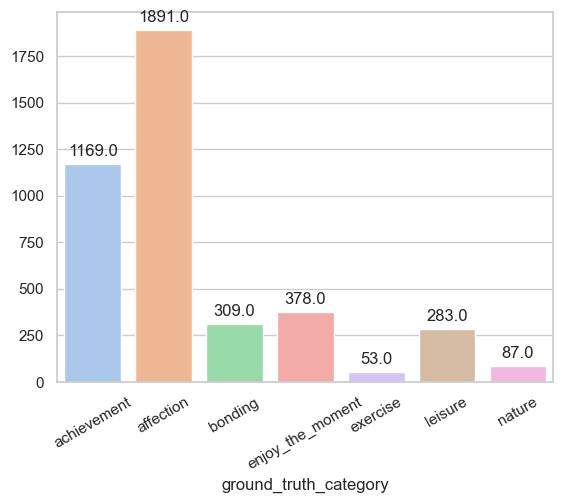

In [140]:
sns.set_theme(style="whitegrid",palette="pastel")
married_series = married_df.groupby(['ground_truth_category'])['value'].sum()
barplot  = sns.barplot(x=married_series.index,y=married_series.values)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=30)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

In [141]:
married_df[married_df['ground_truth_category']=='affection'].to_csv("married_affection.csv")

In [142]:
single_df = adult_df[adult_df['marital'] == 'single'] 

In [145]:
single_df.head(2)

wid  age country gender marital parenthood   hmid reflection_period  \
125   10   27     USA      m  single          n  40557               24h   
126   10   27     USA      m  single          n  46740               24h   

                                           original_hm  \
125  I went to see The Boss Baby with my little bro...   
126  I played my favorite game with one of my favor...   

                                            cleaned_hm  modified  \
125  I went to see The Boss Baby with my little bro...      True   
126  I played my favorite game with one of my favor...      True   

     num_sentence ground_truth_category predicted_category  
125             2             affection          affection  
126             2               bonding            bonding

In [148]:
# single_series = single_df.groupby(['ground_truth_category'])['value'].sum()
# barplot  = sns.barplot(x=single_series.index,y=single_series.values)
# barplot.set_xticklabels(barplot.get_xticklabels(), rotation=30)
# for p in barplot.patches:
#     barplot.annotate(format(p.get_height(), '.1f'), 
#                      (p.get_x() + p.get_width() / 2., p.get_height()),
#                      ha = 'center', va = 'center', 
#                      xytext = (0, 9), 
#                      textcoords = 'offset points')

In [ ]:
# single_df[single_df['ground_truth_category']=='achievement'].to_csv("single_achievement.csv")